<a href="https://colab.research.google.com/github/orhanaydinn/sign_language_Project/blob/main/Sign_Language_Detection_project_RealTime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: Problem Definition

##1.1 Context and Motivation
Many people with hearing or speech impairments use sign language to communicate, but not everyone understands it. This situation can make daily communication difficult, especially in public places such as schools, hospitals, and offices. However, technology can help bridge this gap.

With the advancement of technology, humans have the ability to teach computers to recognize hand gestures using computer vision and artificial intelligence (AI) techniques. By using a webcam and a trained model, a computer can detect and understand sign language signs in real time. This project focuses on developing a system that recognizes hand signs for the numbers 0 to 9. This is a good starting point for creating more advanced sign language recognition systems in the future.

According to recent studies, AI models such as convolutional neural networks (CNNs) have shown strong performance in image recognition tasks (LeCun et al., 2015). Lightweight models like MobileNetV2 are particularly useful for real-time applications due to their speed and efficiency (Sandler et al., 2018).

##1.2 Problem Statement
Current sign language recognition systems work well in lab settings but struggle in real life. Things like changing light, messy backgrounds, and different hand positions can confuse the system. The main problem this project aims to solve is building a model that works reliably in everyday settings using just a webcam.

##1.3 Aim
The aim is to build an AI system that can detect and recognize hand gestures for the digits 0 to 9 in real time. The model should be fast, accurate, and work well in different lighting and background conditions.

##1.4 Objectives
*  To prepare a dataset of hand sign images for numbers 0 to 9.
*  To apply data augmentation techniques like rotation, flipping, and brightness changes.
*  To train different models  and fine-tune it for recognizing 10 different hand gestures.
*  To test the system using a live webcam and provide visual feedback.
*  To achieve at least 95% accuracy in both training and real-time testing.



#Chapter 2: Data Acquisition and Preparation

The dataset used in this study was specifically created for the purpose of developing a real-time sign language recognition system. The dataset contains labeled images of hand gestures representing the numbers 0 to 9. Each class is kept in a separate folder, which facilitates data loading and labeling.

The dataset is uploaded to Google Drive and downloaded to the workspace using Python. This method ensures reproducibility and ease of access, especially in cloud-based workspaces such as Google Colab or Jupyter Notebook.

An important feature of the dataset is that it is diverse in a way that reflects real-world conditions. The following variations are present in the images:


*   Different hand sizes
*   Lighting conditions
*   Backgrounds and environmental differences


This diversity increases the ability of the model to generalize to different users and scenarios.

## 2.1 - Uploaded Dataset

The dataset was downloaded as a compressed file `ZIP format - SL_Numbers.zip` and extracted using Python libraries. The extracted folder `SL_Numbers_dataset` contains 10 subfolders named from 0 to 9. These folders contain the relevant hand gesture images.

In [ ]:
!pip install -q gdown
import gdown

# https://drive.google.com/file/d/1s2UHJu2SC1fWlzAS2ib3FF25_3qlpMeh/view?usp=sharing

file_id = "1s2UHJu2SC1fWlzAS2ib3FF25_3qlpMeh"
url = f"https://drive.google.com/uc?id={file_id}"
output = "SL_Numbers.zip"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1s2UHJu2SC1fWlzAS2ib3FF25_3qlpMeh
From (redirected): https://drive.google.com/uc?id=1s2UHJu2SC1fWlzAS2ib3FF25_3qlpMeh&confirm=t&uuid=b20b73e9-f4d8-487d-b8db-1515ddb3f70b
To: C:\Users\Orhan\SL_Numbers_Project\SL_Numbers.zip
100%|██████████| 1.70G/1.70G [00:40<00:00, 41.5MB/s]


'SL_Numbers.zip'

SL_Numbers.zip file upload with google drive link.
```
zip_path = "/content/SL_Numbers.zip
extract_path = "/content/SL_Numbers"
```
**zip_path** represents the file path of the uploaded ZIP file.

**extract_path** defines the destination directory where the contents of the ZIP file will be extracted.

In [ ]:
import zipfile
import os

# File and directory paths to extract
zip_path = "C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers.zip"
extract_path = "C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


### 2.1.1 - Check Check Main Dataset File

The below code show the struture of folder which contains multiple images of a hand showing that number. This folder structure is perfect for training an image classification model using PyTorch’s built-in utilities.

Check the loaded datasets before data preparation process.

In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(f"\n{root}")
    for d in dirs:
        print(f"├── {d}")
    for f in files[:5]:
        print(f"├── {f}")


C:\Users\Orhan\SL_Numbers_Project\SL_Numbers_datasets
├── SL_Numbers
├── SL_Numbers_merged
├── SL_Numbers_merged_aug
├── SL_Numbers_our
├── best_model_cnn.pth
├── best_model_mobilenetv2.pth
├── best_model_mobilenetv2_finetuned.pth
├── best_model_resnet50.pth
├── best_model_resnet50_finetuning.pth

C:\Users\Orhan\SL_Numbers_Project\SL_Numbers_datasets\SL_Numbers
├── 0
├── 1
├── 2
├── 3
├── 4
├── 5
├── 6
├── 7
├── 8
├── 9

C:\Users\Orhan\SL_Numbers_Project\SL_Numbers_datasets\SL_Numbers\0
├── zero_1.jpg
├── zero_10.jpg
├── zero_100.jpg
├── zero_1000.jpg
├── zero_1001.jpg

C:\Users\Orhan\SL_Numbers_Project\SL_Numbers_datasets\SL_Numbers\1
├── one_1.jpg
├── one_10.jpg
├── one_100.jpg
├── one_1000.jpg
├── one_1001.jpg

C:\Users\Orhan\SL_Numbers_Project\SL_Numbers_datasets\SL_Numbers\2
├── two_1.jpg
├── two_10.jpg
├── two_100.jpg
├── two_1000.jpg
├── two_1001.jpg

C:\Users\Orhan\SL_Numbers_Project\SL_Numbers_datasets\SL_Numbers\3
├── three_1.jpg
├── three_10.jpg
├── three_100.jpg
├── three_

### 2.1.2 - Check Images for All Classes

To ensure that the classes in the dataset are loaded correctly and that there are enough images in each class, random examples from each class are visualized.

It selects three random images from each class folder in the specified directory and displays them using the Matplotlib library. The images are readable, resized, and color corrected (BGR to RGB). This process allows for visual control of data quality and diversity.

Thanks to this visualization step;

*   Whether there is data in each class,

*   The readability of the visuals,

*   Attributes such as size and quality were quickly observed and checked.

**` def show_random_images(dataset_dir, samples=3):`**
This function displays a random 3 sample images from each class.

**`img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`**
cv2 library create BGR images default setting. This code convert BGR to RGB.



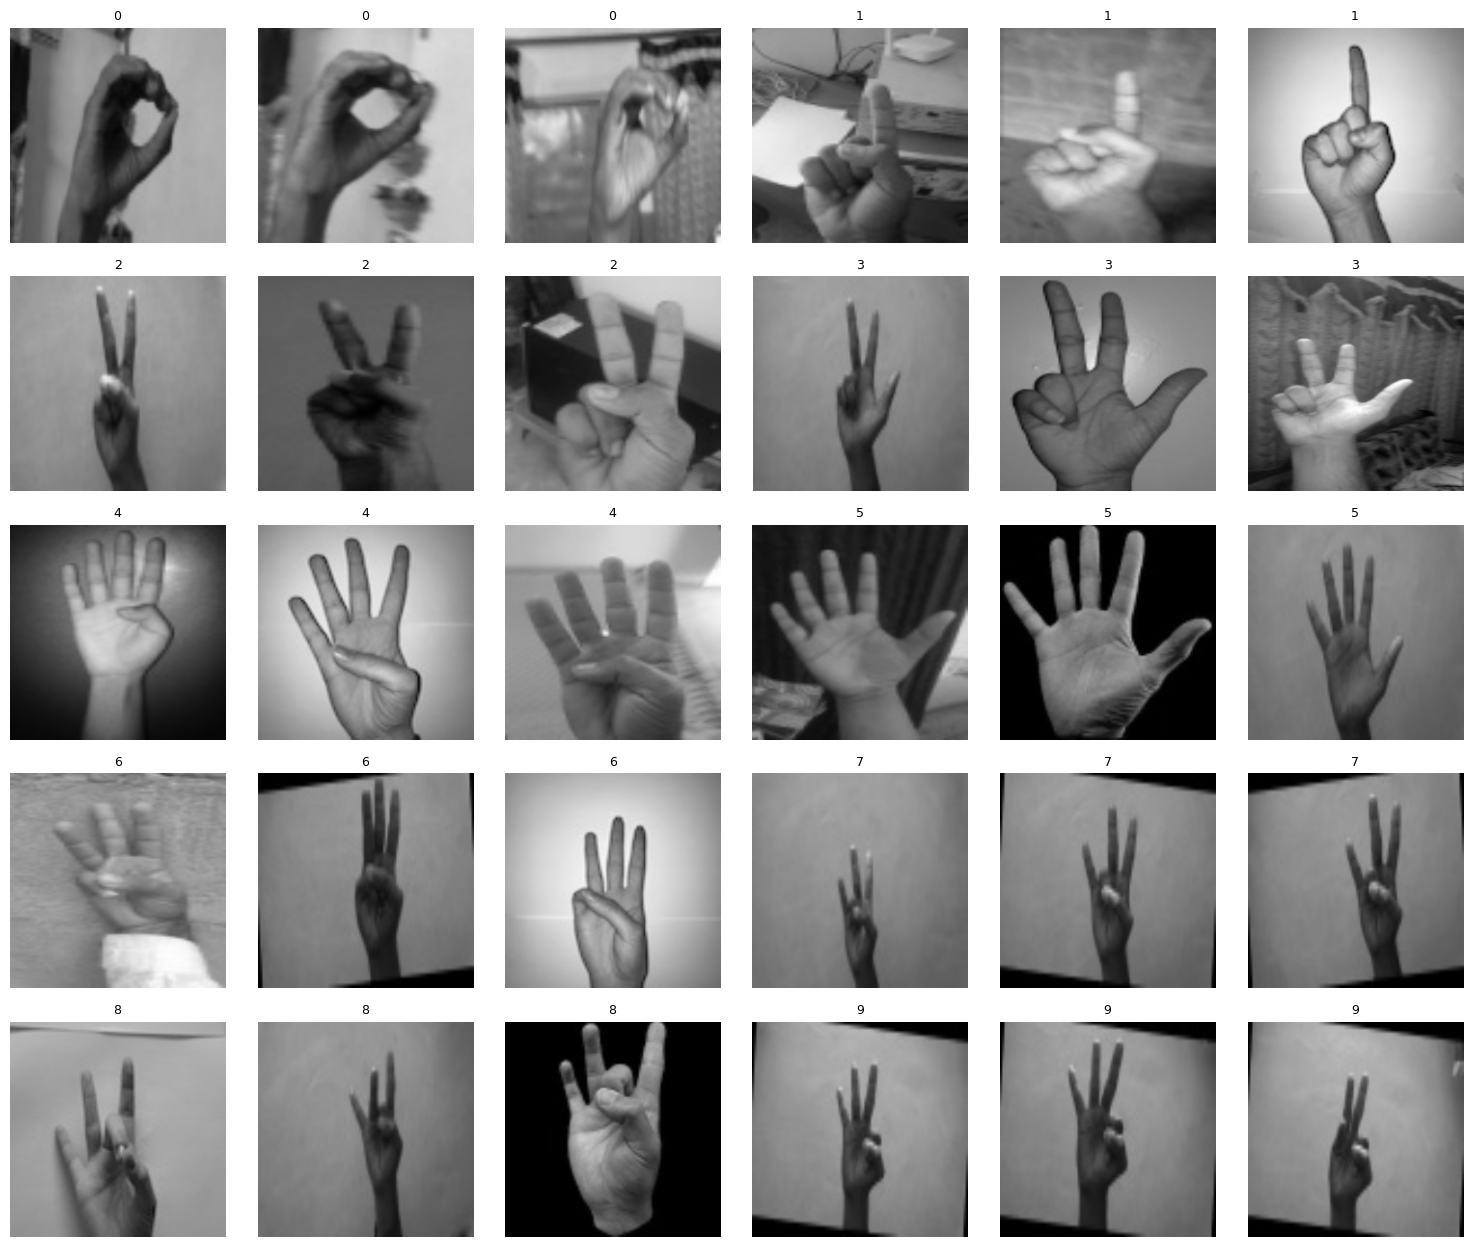

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 224

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers", samples=3)


### 2.1.3 - Check Main Dataset Count

Determining the total number of images for each class in the dataset is important for the evaluation of the amount of data. In this step, the image files in one of its classes were counted and the results were visualized both as a table and a bar chart.

The code calculates the total number of images for each class by saving only files with the extensions `.jpg`, `.jpeg` and `.png`. The numbers were then transferred to the Pandas DataFrame structure and visualized with Seaborn & Matplotlib.

In this section;

*   The total number of images in the dataset was calculated.

*   It was visually examined whether there was an imbalance between classes.

*   The number of data corresponding to each sign language was observed.

   Class  Image Count
0   zero         1500
1    one         1500
2    two         1500
3  three         1500
4   four         1500
5   five         1500
6    six         1500
7  seven         1500
8  eight         1500
9   nine         1500

Total Image: 15000


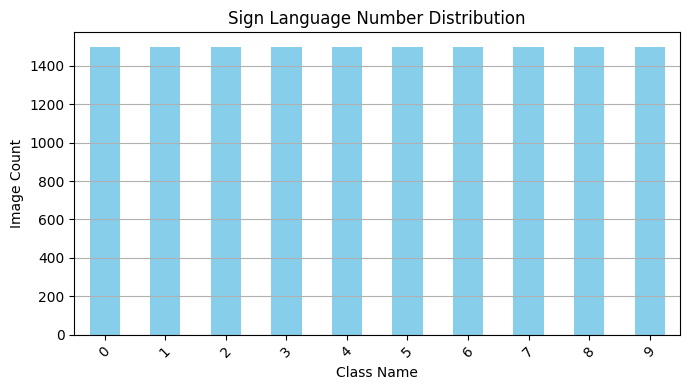

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

df.plot(kind="bar", figsize=(7, 4), legend=False, color="skyblue")
plt.title("Sign Language Number Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **2.2 - Sign Language Data Preparation & Preprocessing**

This section explains how sign language images were prepared for model training. First, a richer and more diverse data set was created by combining the ready data set and the special images collected by the project team. The images were converted to grayscale, resized, and renamed consistently.

Data augmentation was applied to increase the real-time prediction success. Each image was rotated at different angles to increase the data diversity. Therefore, the model was developed to recognize different hand positions.

The paths and class labels of all images were recorded in a list and made ready for the training process. These steps were followed to ensure that the model produces more accurate, balanced and generalizable results.

### 2.2.1  - Add Our Dataset

In order for the model to provide more accurate and stable results in real-world conditions, special images collected by the project team were included in the dataset. These images aim to ensure that the model developed within the scope of the project can work in harmony with different individuals' hand shapes, skin colors and various background conditions.

The code snippet visualizes three random images from each class folder in the **SL_Numbers_our** directory. The images were readability checked, converted to RGB format and resized to 224x224 to be compatible with the model.

Thanks to this step:

*   The model's resistance to individual variations has been increased.

*   Suitability for real-time applications has been tested.

*   Dataset diversity has been enriched.

With this additional data, the model is aimed to work effectively not only with ready data but also with real user data.

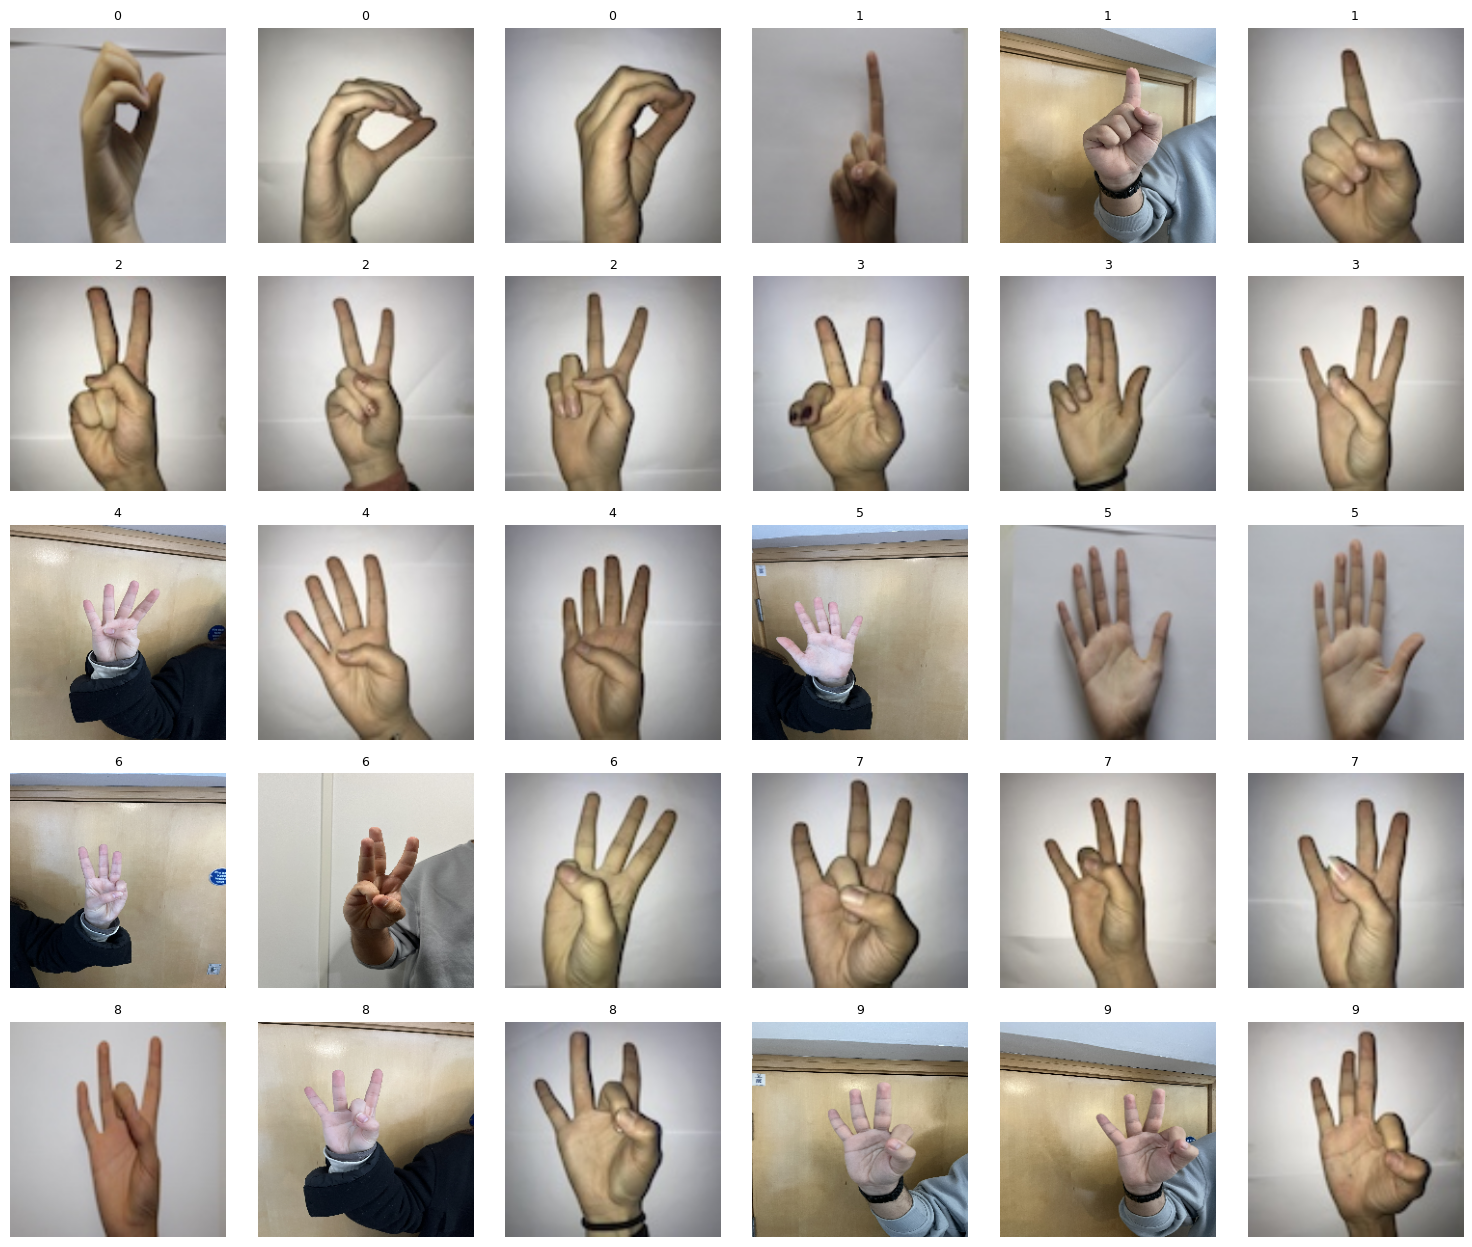

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 224

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers_our'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers_our", samples=3)


### 2.2.2  - Check Our Dataset Count

In order to assess whether the classes in the specific dataset included in the project were represented in a balanced way, the number of images belonging to each class was analyzed. This process is critical to prevent any class from becoming dominant during the training process of the model and to ensure that the learning process is fair.

The number of images belonging to each class was easily observed.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_our"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")



   Class  Image Count
0   zero          251
1    one          251
2    two          251
3  three          251
4   four          251
5   five          251
6    six          251
7  seven          251
9   nine          251
8  eight          248

Total Image: 2507


### 2.2.3 - Merge Main and Our Dataset

The model to have a more general and robust structure, the ready dataset and the images collected specifically for the project were merged. This process brings both data sources together under a single structure and thus ensures that all data is presented under the same format and directory structure during model training.

The operation of the code can be summarized as follows:

The main dataset is copied: A new folder named SL_Numbers_merged is created and the existing original dataset is copied to this directory.
Our own images are added: The data in the SL_Numbers_our folder is transferred to the relevant class folders.
Processing of the images:

The images are converted to grayscale.

They are resized to 224x224.

Each image is renamed in the format {class_name}_{index}.jpg, such as zero_1.jpg, four_8.jpg. The script checks for existing file names to avoid conflicts.


All data is collected in a single standard folder structure.

The dimensions and shapes of the images have been aligned with the model's input expectations.

A consistent naming system has been applied for images added to the dataset.

This merging process aims to directly increase the model's performance by making the training data more robust and diverse overall.

`original_dataset` The folder containing the original images.

`our_dataset_name` The folder containing the our images.

`merged_dataset` The folder where the merged and processed dataset will be output.

A new folder named **merged_dataset** was created. Thus, we did not interfere with the original dataset and our own dataset.

```
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}
```

Class names in the original structure are numeric (0, 1, 2...), and a mapping dictionary is used to convert these to human-readable labels like "zero", "one".



```
for fname in os.listdir(target_folder):
    match = re.match(f"{label_name}_(\d+)", fname)
```
Existing files in the target folder are checked. The highest photo name is taken and the newly added photos continue after this index.


In [ ]:
import os
import shutil
import cv2
import re

original_dataset = "/content/SL_Numbers_datasets/SL_Numbers"
our_dataset_name = "/content/SL_Numbers_datasets/SL_Numbers_our"
merged_dataset = "SL_Numbers_merged"
img_size = 224

label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}


if os.path.exists(merged_dataset):
    shutil.rmtree(merged_dataset)
shutil.copytree(original_dataset, merged_dataset)
print("Original dataset copied to SL_Numbers_merged")


for raw_label in os.listdir(our_dataset_name):
    if raw_label not in label_map:
        print(f"Unknown label: {raw_label}")
        continue

    label_name = label_map[raw_label]
    source_folder = os.path.join(our_dataset_name, raw_label)
    target_folder = os.path.join(merged_dataset, raw_label)

    if not os.path.exists(target_folder):
        print(f"Target folder does not exist: {target_folder}")
        continue


    max_index = 0
    for fname in os.listdir(target_folder):
        match = re.match(f"{label_name}_(\d+)", fname)
        if match:
            max_index = max(max_index, int(match.group(1)))

    added_count = 0
    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (img_size, img_size))

        new_index = max_index + 1
        new_filename = f"{label_name}_{new_index}.jpg"
        save_path = os.path.join(target_folder, new_filename)
        cv2.imwrite(save_path, resized)
        max_index = new_index
        added_count += 1

    print(f"Finished processing class: {raw_label} - {added_count} image(s) added ")


Original dataset copied to SL_Numbers_merged
Finished processing class: 3 - 251 image(s) added 
Finished processing class: 0 - 251 image(s) added 
Finished processing class: 6 - 251 image(s) added 
Finished processing class: 8 - 248 image(s) added 
Finished processing class: 7 - 251 image(s) added 
Finished processing class: 9 - 251 image(s) added 
Finished processing class: 5 - 251 image(s) added 
Finished processing class: 4 - 251 image(s) added 
Finished processing class: 1 - 251 image(s) added 
Finished processing class: 2 - 251 image(s) added 


### 2.2.4  - Check Current**(SL_Numbers_merged)** Dataset

After the merging process is completed, the number of images belonging to each class was analyzed to verify the integrity and distribution of the generated **SL_Numbers_merged** dataset.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_merged"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

   Class  Image Count
0   zero         1751
1    one         1751
2    two         1751
3  three         1751
4   four         1751
5   five         1751
6    six         1751
7  seven         1751
9   nine         1751
8  eight         1748

Total Image: 17507


### 2.2.5 - Data Augmentation

To improve real-time prediction performance, systematic data augmentation is applied to the merged dataset. This process aims to increase model performance during the real time prediction.

The code snippet uses the following data augmentation strategy:

Each original image is rotated to the left by 5 different angles and to the right by 5 different angles, producing a total of 10 new images.

New images were generated from different angles using the merged dataset.

`target_dir = "/content/SL_Numbers_merged_aug"` New Dataset Folder Name and Path

`def rotate(img, angle):` Rotates the image.

```
for i in range(1, 6):  # 5, 10, ..., 25 angles
    angle = i * 5
    rotated = rotate(img, angle)
    save_name = f"{base_name}_L_{i}.jpg"
```
Five new photographs, each rotated five degrees to the left, were generated.

`save_name = f"{base_name}_L_{i}.jpg"` new generated images was saved.

`one_1_L_1.jpg`  (one_1.jpg was rotated **5** degrees left)

`one_1_L_2.jpg  `(one_1.jpg was rotated **10** degrees left)

...

`one_1_R_5.jpg`  (one_1.jpg was rotated **25** degrees left)


```
for i in range(1, 6):  # 5, 10, ..., 25 angles
    angle = -i * 5
    rotated = rotate(img, angle)
    save_name = f"{base_name}_R_{i}.jpg"
```
Five new photographs, each rotated five degrees to the right, were generated.

```
    save_name = f"{base_name}_r_{i}.jpg"
```
Five new photographs, each rotated five degrees to the left, were generated.

`save_name = f"{base_name}_r_{i}.jpg"` new generated images was saved.

`one_1_L_1.jpg`  (one_1.jpg was rotated **5** degrees right)

`one_1_L_2.jpg  `(one_1.jpg was rotated **10** degrees right)

In [ ]:
import os
import cv2

source_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged"
target_dir = "/content/SL_Numbers_merged_aug"
img_size = 224

# Label → filename prefix map
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def rotate(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)

total_augmented = 0


for label in os.listdir(source_dir):
    src_folder = os.path.join(source_dir, label)
    dst_folder = os.path.join(target_dir, label)
    os.makedirs(dst_folder, exist_ok=True)

    label_prefix = label_map.get(label, label)

    class_augmented = 0

    for fname in os.listdir(src_folder):
        if not fname.lower().endswith(".jpg"):
            continue

        fpath = os.path.join(src_folder, fname)
        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to read: {fname}")
            continue

        base_name = fname.split(".")[0]

        for i in range(1, 6):  # For Left
            angle = i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_L_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

        for i in range(1, 6):  # For Right
            angle = -i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_R_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

    print(f" Finished processing class: {label} - {class_augmented} image added")

print(f"\nTotal Image: {total_augmented}")


 Finished processing class: 3 - 17510 image added
 Finished processing class: 0 - 17510 image added
 Finished processing class: 6 - 17510 image added
 Finished processing class: 8 - 17480 image added
 Finished processing class: 7 - 17510 image added
 Finished processing class: 9 - 17510 image added
 Finished processing class: 5 - 17510 image added
 Finished processing class: 4 - 17510 image added
 Finished processing class: 1 - 17510 image added
 Finished processing class: 2 - 17510 image added

Total Image: 175070


### 2.2.6 - Check Data Augmentation Image

After the data augmentation process was completed, the quality control and diversity of the newly created images were evaluated. In this step, examples from the augmented images belonging to each class were visualized and it was examined whether the applied transformations were successful.

The code takes a certain number of initial images (for example 10) from each class in the SL_Numbers_merged_aug folder and draws these images on the screen with Matplotlib in a row-column order.

This step:

*   The readability and consistency of the rotated images were checked.

*   It was verified whether the image files were assigned to the correct classes and formats.

*   A final visual inspection was performed on the final dataset on which the model would be trained.

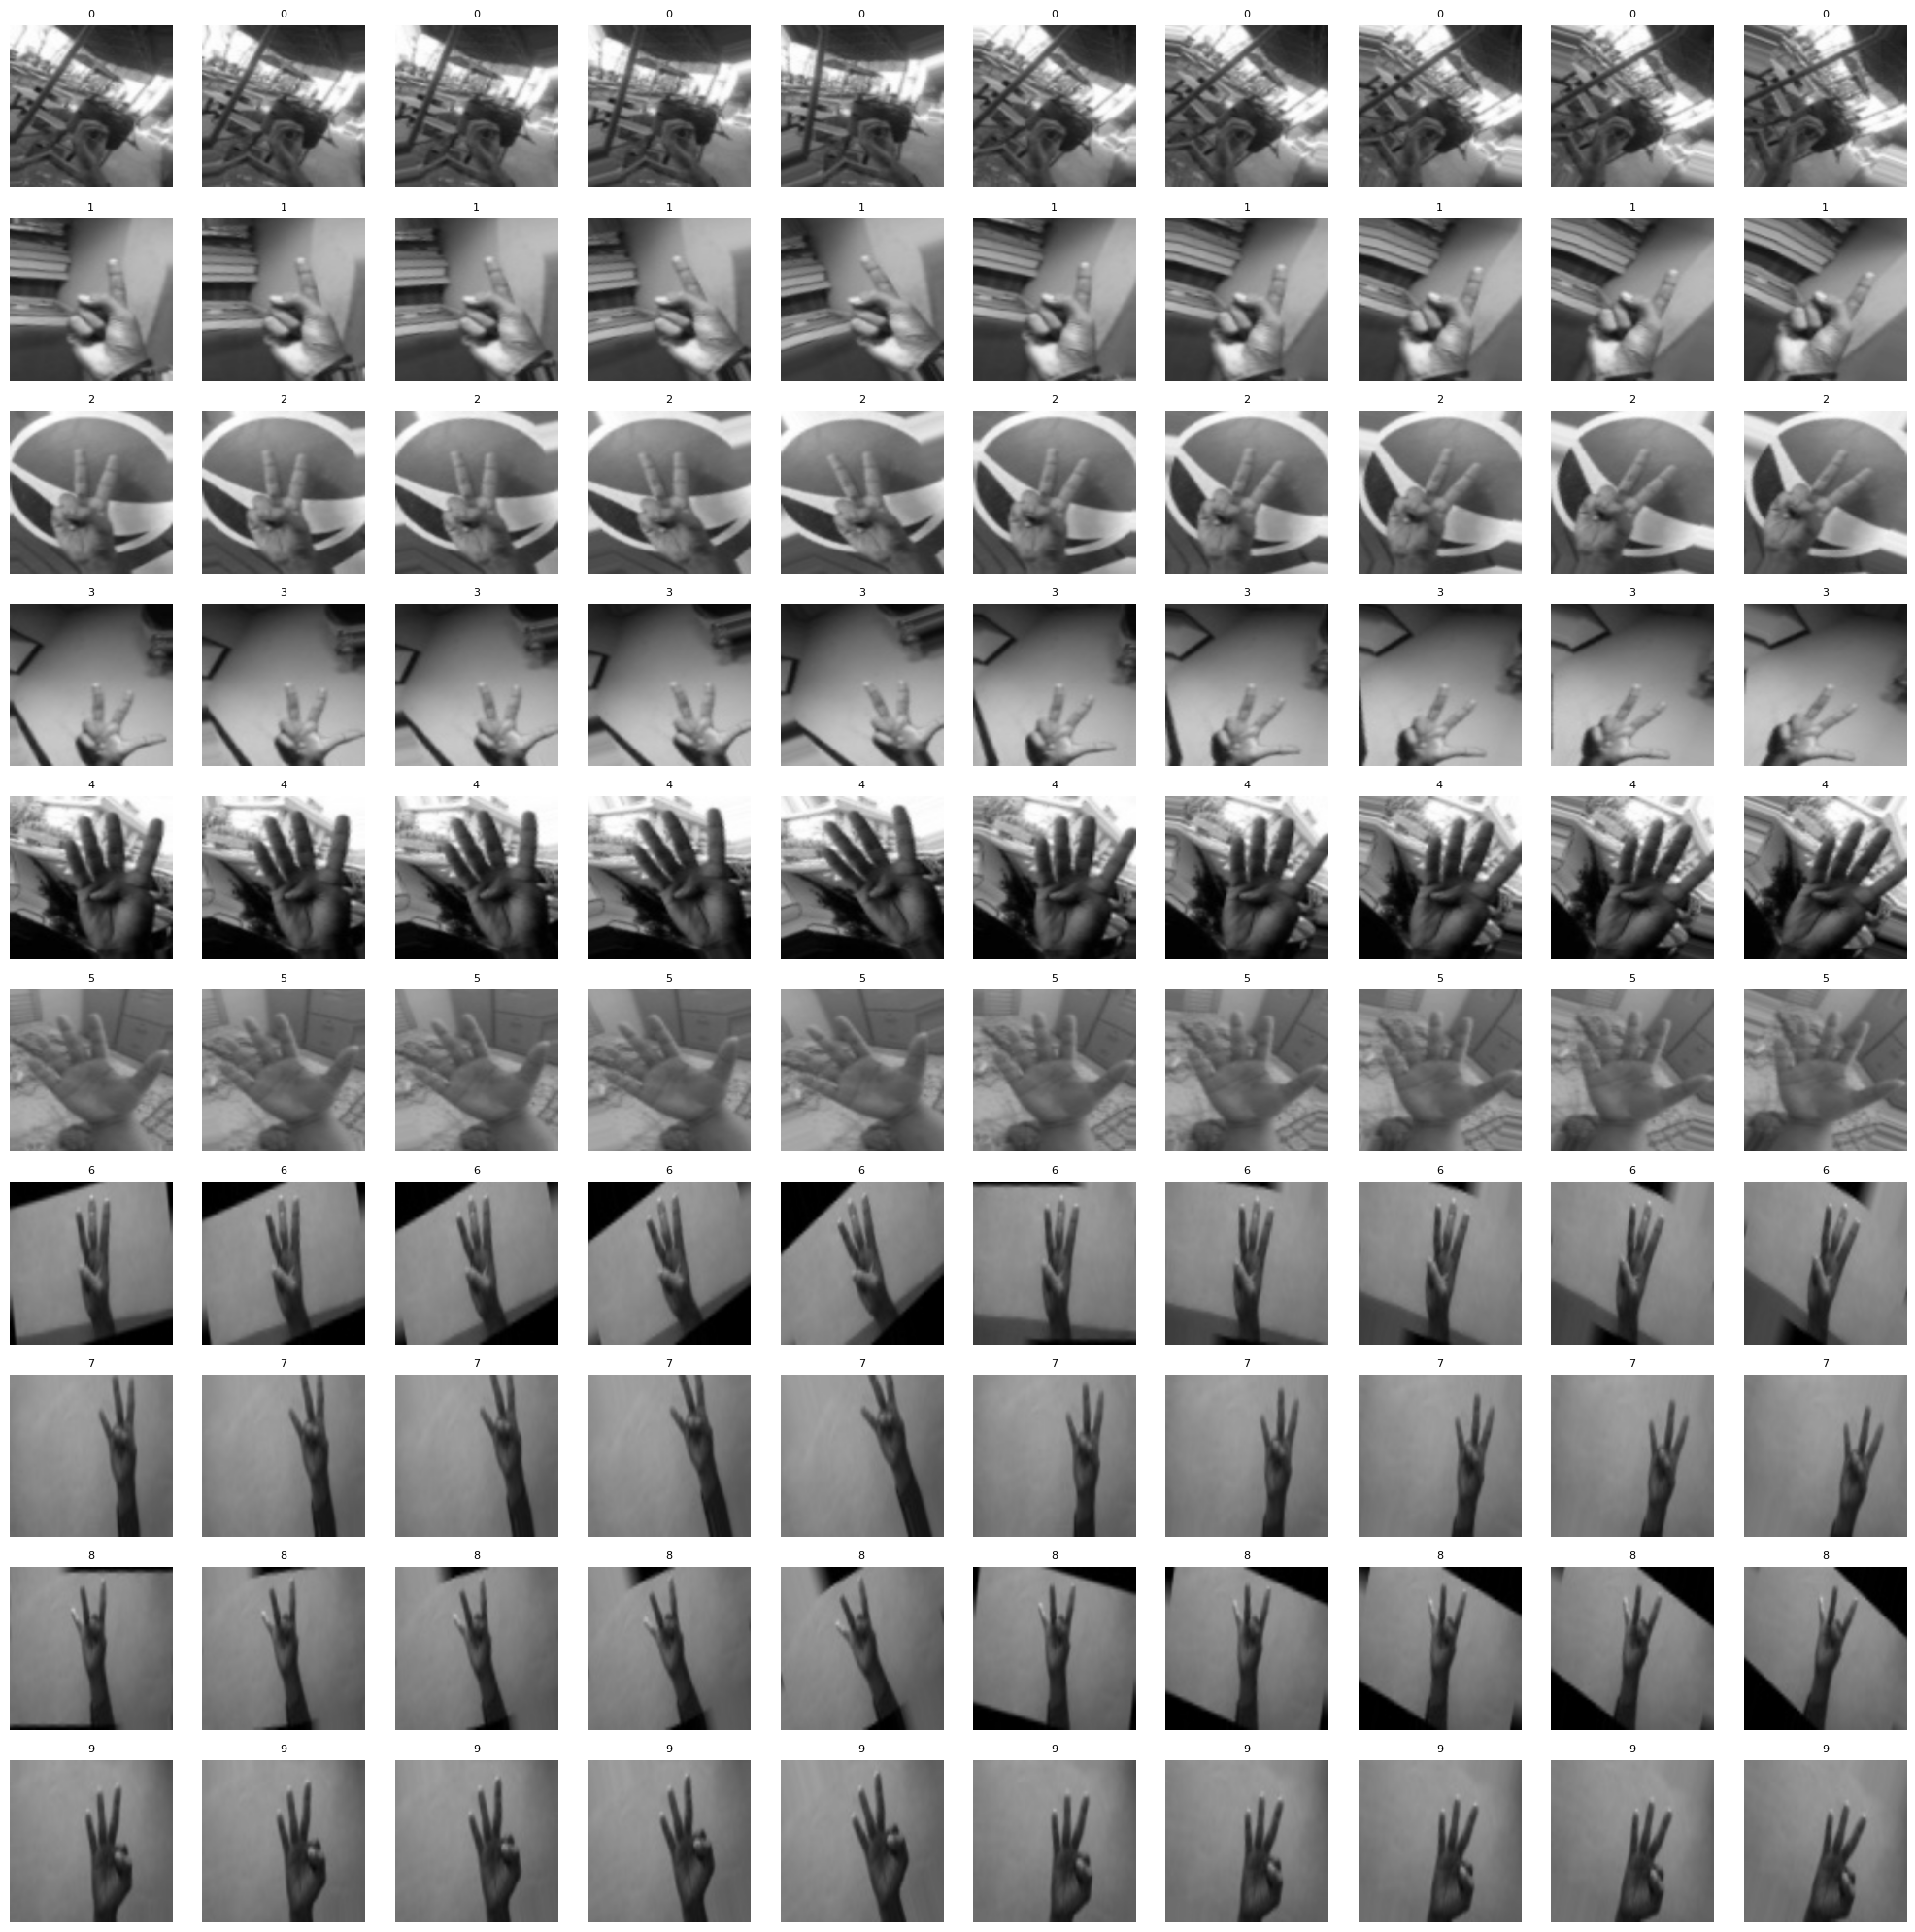

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 224

def show_first_images(dataset_dir, samples=10):
    class_folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize=(cols * 2, rows * 2))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(dataset_dir, label)
        images = sorted(os.listdir(class_path))[:samples]

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=8)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_first_images("/content/SL_Numbers_datasets/SL_Numbers_merged_aug", samples=10)

### 2.2.7  - Image Path and Label List

All images which are located `SL_Numbers_merged_aug` file and numeric labels are converted into list for model training. This list represents the structure of the model before being passed to the `PyTorch DataLoader`.

*   Each class directory in the main folder is entered.

*   All images with `.jpg`, `.jpeg`, `.png` extensions are scanned.

*   The full path `img_path` of each image and the numerical label `int(label)` of the class it belongs to are added to the `image_label_list` list as a tuple.

*   In addition, a random sample image is selected for each class and stored in the `sample_per_class` dictionary.

In [ ]:
import os
import random

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged_aug"
image_label_list = []

# Sample All Class
sample_per_class = {}

for label in sorted(os.listdir(base_dir)):
    class_dir = os.path.join(base_dir, label)
    if not os.path.isdir(class_dir):
        continue
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        image_label_list.append((img_path, int(label)))  # label: 0-9


    if images:
        random_img = random.choice(images)
        random_img_path = os.path.join(class_dir, random_img)
        sample_per_class[label] = random_img_path


print(f"Total Image: {len(image_label_list)}")

for label, img_path in sample_per_class.items():
    print(f"Class {label}: {img_path}")

Total Image: 175070
Class 0: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/0/zero_41_R_3.jpg
Class 1: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/1/one_1281_L_5.jpg
Class 2: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/2/two_286_L_5.jpg
Class 3: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/3/three_1546_R_3.jpg
Class 4: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/4/four_522_R_3.jpg
Class 5: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/5/five_570_L_4.jpg
Class 6: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/6/six_1176_L_1.jpg
Class 7: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/7/seven_1457_L_3.jpg
Class 8: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/8/eight_1736_L_5.jpg
Class 9: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/9/nine_946_L_5.jpg


# **Chapter 3: Model Training & Evaluation**

## 3.1 - Train / Validation Split & DataLoader Preparation

The dataset was prepared to training. We started by creating a custom class called `SignLanguageDataset`. This class helps to understand **PyTorch** how to load each image and match it with the correct digit label from 0 to 9. It also helps to apply image processing steps like resizing and normalizing.

*   The dataset was splitting into **80%** for training and **20%** for validation, with balanced digit classes both sets.
.

*   Images were resized to **224x224**, converted to tensors, normalized, and augmented to improve model learning and generalization.

*   PyTorch `DataLoaders` loaded images in batches of 32 with shuffling and parallel workers to speed up and optimize training.

In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class SignLanguageDataset(Dataset):
    def __init__(self, image_label_list, transform=None):
        self.data = image_label_list  # List: (path, label)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")  # Grayscale

        if self.transform:
            image = self.transform(image)

        return image, label

To evaluate the model's generalization performance, the dataset was divided into two different subsets. 80% for training and 20% for validation. This approach allows for robust assessment of how well the model learns from data it has never seen during training.

A stratified split was used via `train_test_split` from Scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader

train_list, val_list = train_test_split(
    image_label_list,
    test_size=0.2,
    stratify=[label for _, label in image_label_list],
    random_state=42
)

In [ ]:
print(f"Train set: {len(train_list)} images")
print(f"Validation set: {len(val_list)} images")

Train set: 140056 images
Validation set: 35014 images


This transformation is used to bring the details into a standard format before model training:

*   `Resize((224, 224)):` Resizes the images to fit the input size of the model.

*   `ToTensor():` Converts the image to a PyTorch tensor and scales the pixel values ​​to the range [0, 1].

*  ` Normalize(mean=[0.5], std=[0.5]):` Normalizes the pixel values ​​to the range [-1, 1], which allows the model to learn more stably.

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
train_dataset = SignLanguageDataset(train_list, transform=train_transforms)
val_dataset   = SignLanguageDataset(val_list, transform=val_transforms)

PyTorch `DataLoader` structures allow the model to process data efficiently:

*   `train_loader` Loads the training dataset in mini-batches of 32, shuffled `shuffle=True`. This reduces overfitting by making the model see the data in a different order in each epoch.

*   `val_loader` Loads the validation data sequentially `shuffle=False`. This ensures consistent evaluation.

*   `num_workers=8` Increases processing speed by using eight threads for data loading.

*   `pin_memory=True `Allows data to be moved to the GPU faster in CUDA-accelerated training.



In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=8, pin_memory=True)

## 3.2 -CNN - Model Architecture

The CNN model we built from scratch was designed to recognize hand gesture images by learning important visual patterns. It starts with three convolutional layers that detect different features in the images, such as edges, curves, and shapes. Each convolutional layer is followed by a ReLU activation function to add non-linearity and a max pooling layer to reduce the image size and keep the most important features. After these layers, the data is flattened and passed through two fully connected `dense` layers, which help the model learn combinations of features and make the final prediction. The output layer has 10 nodes, one for each digit from 0 to 9. This simple yet effective structure allowed the model to learn quickly and perform with high accuracy.

Convolutional Neural Networks `CNNs` are widely used in computer vision tasks due to their ability to learn spatial hierarchies of features through local connections and shared weights, making them highly efficient for image classification problems (LeCun et al., 2015).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  #--- conv1: Takes the input image with 3 channels and applies 32 filters of size 3×3.
        self.pool  = nn.MaxPool2d(2, 2)  #--- Reduces the image size by half to make learning faster and reduce memory use.
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) #--- conv2: Takes the output from the first layer and applies 64 filters.
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  #--- conv3: Applies 128 filters to extract deeper features.

        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv3(x)))  # 16x16 → 8x8
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn = SignLanguageCNN(num_classes=10).to(device)
print(model_cnn)

SignLanguageCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


### 3.2.1 - CNN Model Training

The custom CNN model was trained over 30 epochs using the "Adam optimizer" and "CrossEntropyLoss" for multi-class image classification. The training was performed in mini-batches of 32 images,. Performance was evaluated after each epoch using a validation set.

To avoid `overfitting` and optimize training time, `early stopping` was implemented:
If the validation loss did not improve for 5 consecutive epochs, training was stopped early, and the best-performing model was saved automatically to disk.

**Training Setup**

*   **Optimizer:** Adam with a learning rate of 0.001
*   **Loss function:** CrossEntropyLoss
*   **Batch size:** 32
*   **Early stopping:** Stops training after 5 epochs without improvement
*   **Model saving:** best_model_cnn.pth


During the training the following was followed:
*   Training & validation loss
*   Accuracy
*   Epoch time
*   Total training time

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30 #-- Set max training epochs 30.
patience = 5    #-- Use early stopping after 5 non-improving epochs
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_cnn.pth" #-- save the model


criterion = nn.CrossEntropyLoss() #-- measures how wrong predictions are
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001) #-- optimizer that updates model weights and

# Lists to store loss and accuracy after each epoch for plotting graph
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time() #-- Records the time when training begins

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader) #-- Compute average loss and accuracy
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_cnn.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_cnn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'SignLanguageCNN',
            'state_dict': model_cnn.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 205.28s
  Train Loss: 0.5749 | Train Acc: 80.73%
  Val   Loss: 0.2870 | Val Acc: 90.79%
Best model was saved at epoch: 1
Epoch 2/30 | 204.09s
  Train Loss: 0.1844 | Train Acc: 94.05%
  Val   Loss: 0.1832 | Val Acc: 94.28%
Best model was saved at epoch: 2
Epoch 3/30 | 204.08s
  Train Loss: 0.1032 | Train Acc: 96.65%
  Val   Loss: 0.1531 | Val Acc: 95.27%
Best model was saved at epoch: 3
Epoch 4/30 | 203.92s
  Train Loss: 0.0692 | Train Acc: 97.77%
  Val   Loss: 0.1228 | Val Acc: 96.28%
Best model was saved at epoch: 4
Epoch 5/30 | 203.86s
  Train Loss: 0.0520 | Train Acc: 98.30%
  Val   Loss: 0.1473 | Val Acc: 95.86%
val_accuracy did not improve (1/5)
Epoch 6/30 | 203.73s
  Train Loss: 0.0378 | Train Acc: 98.79%
  Val   Loss: 0.1200 | Val Acc: 96.76%
Best model was saved at epoch: 6
Epoch 7/30 | 203.68s
  Train Loss: 0.0329 | Train Acc: 98.97%
  Val   Loss: 0.1271 | Val Acc: 96.88%
val_accuracy did not improve (1/5)
Epoch 8/30 | 203.51s
  Train Loss: 0.0276 | Train Acc: 99.

### 3.2.2 - CNN Model Training Visualization

Once the CNN model was trained, the learning progress was visualized by plotting the loss and accuracy values ​​recorded at each epoch for both the training and validation sets. These plots provide information into the model’s performance trends over time.

These charts help you visually understand whether the model is **underfitting**, **overfitting**, or **performing well**.

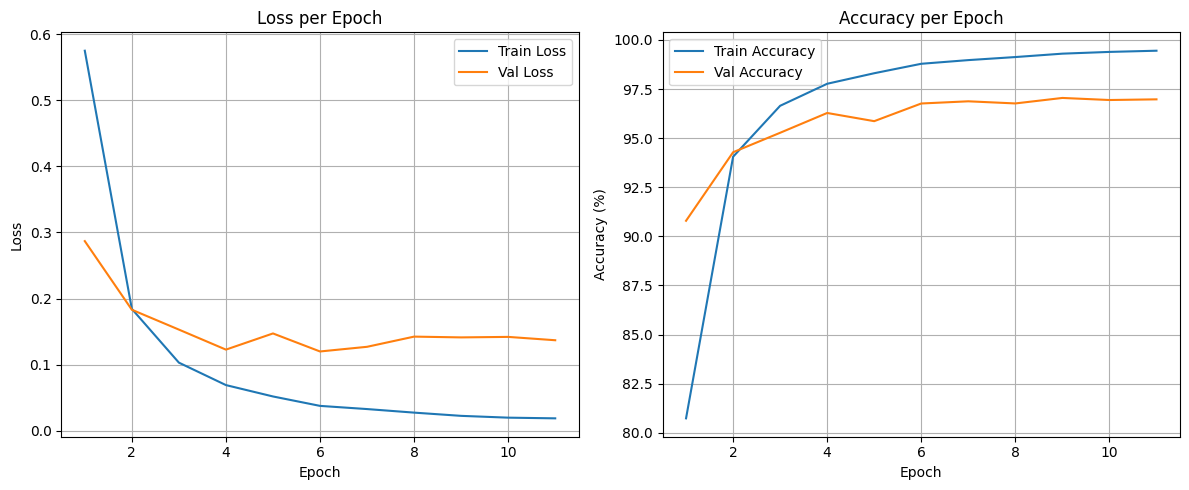

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

# Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, val_accuracies, label="Val Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2.3 - CNN Confusion Matrix & Model Evaluation

After training the CNN model, performance was evaluated on the validation dataset to gain more information into classification. It shows which digits were predicted correctly and which were confused by the model.

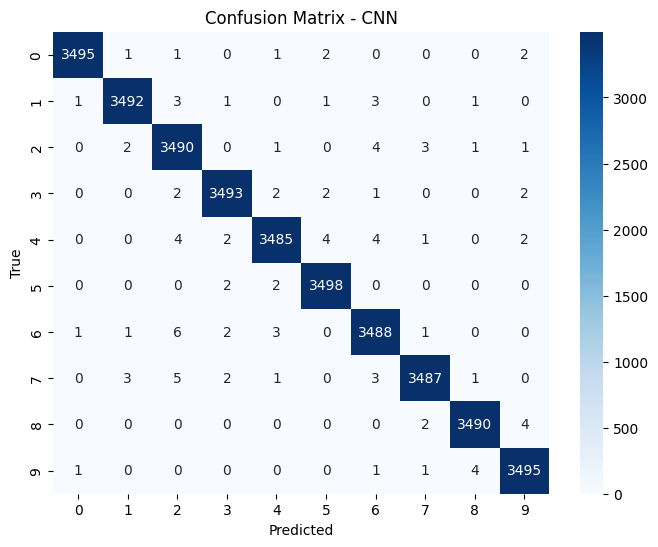


Classification Report - CNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3502
           1       1.00      1.00      1.00      3502
           2       0.99      1.00      1.00      3502
           3       1.00      1.00      1.00      3502
           4       1.00      1.00      1.00      3502
           5       1.00      1.00      1.00      3502
           6       1.00      1.00      1.00      3502
           7       1.00      1.00      1.00      3502
           8       1.00      1.00      1.00      3496
           9       1.00      1.00      1.00      3502

    accuracy                           1.00     35014
   macro avg       1.00      1.00      1.00     35014
weighted avg       1.00      1.00      1.00     35014



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv3(x)))  # 16x16 → 8x8
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SignLanguageCNN().to(device)
checkpoint = torch.load("/content/SL_Numbers_datasets/best_model_cnn.pth", map_location=device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# Prediction
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN")
plt.show()

# Classification Report
print("\nClassification Report - CNN:")
print(classification_report(all_labels, all_preds, target_names=class_names))

After training the CNN model, we evaluated its performance on the validation dataset using a confusion matrix and a classification report. The confusion matrix visually showed how many times each digit was correctly predicted and where the model made mistakes. Ideally, most values ​​should appear on the diagonal, indicating correct predictions, and our model did this in most cases.

Additionally, the classification report provided detailed metrics such as **precision**, **recall**, and **F1 score** for each digit, confirming that the model performed consistently well across all classes. This evaluation demonstrated the strengths of the model and helped us interpret the class-based prediction information.

## 3.3 - VGG16 Transfer Learning Model Architectire

In this section, the architecture of VGG16, a convolutional neural network trained on the ImageNet dataset for sign language digit classification, is adapted.

Instead of training a deep model from scratch, transfer learning leverages VGG16's pre-learned feature extraction capabilities to reduce training time and improve performance on smaller, task-specific datasets.

*   A pre-trained VGG16 model was loaded using PyTorch's `torchvision.models`.
*   The earlier convolutional layers were frozen `requires_grad=False` to retain their ability to extract general visual features such as edges, textures, and shapes.
*   The final fully connected layer of the classifier was replaced with a new `Linear` layer containing 10 output units, each corresponding to one of the hand gesture digit classes (0–9).

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()

        self.base_model = models.vgg16(pretrained=True)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_vgg = VGG16SignLanguage(num_classes=10, freeze=True).to(device)

print(model_vgg)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 176MB/s]


VGG16SignLanguage(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tru

### 3.3.1 - VGG16 Model Training

The VGG16-based transfer learning model was trained using a standard deep learning approach, similar in structure to the custom CNN model. However, due to the deeper architecture and the use of pretrained layers, only the classifier head `final layers` was set to be trainable, while the earlier convolutional layers were frozen to retain their learned visual features from the ImageNet dataset.

**Training Setup**

*   **Loss function:** CrossEntropyLoss was used to quantify prediction errors.
*   **Optimizer:** Adam was applied, but only to parameters with requires_grad=True—i.e., the final layers of the network.
*   **Epochs:** Training was capped at 30 epochs with early stopping after 5 epochs of non-improving validation loss.
*  **Model saving:** The best-performing model based on validation loss was saved to best_model_vgg16.pth.


During the training the following was followed:

Training & validation loss
Accuracy
Epoch time
Total training time

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_vgg.parameters()), lr=0.001)
num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_vgg16.pth"

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_vgg.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_vgg.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_vgg(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - epoch_start

    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'VGG16SignLanguage',
            'state_dict': model_vgg.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 605.68s
  Train Loss: 0.5008 | Train Acc: 87.82%
  Val   Loss: 0.1391 | Val Acc: 95.80%
Best model was saved at epoch: 1
Epoch 2/30 | 605.35s
  Train Loss: 0.3434 | Train Acc: 92.98%
  Val   Loss: 0.1045 | Val Acc: 96.64%
Best model was saved at epoch: 2
Epoch 3/30 | 605.19s
  Train Loss: 0.3078 | Train Acc: 94.24%
  Val   Loss: 0.0836 | Val Acc: 97.45%
Best model was saved at epoch: 3
Epoch 4/30 | 605.05s
  Train Loss: 0.2803 | Train Acc: 94.75%
  Val   Loss: 0.0942 | Val Acc: 97.06%
val_accuracy did not improve (1/5)
Epoch 5/30 | 604.93s
  Train Loss: 0.2609 | Train Acc: 95.29%
  Val   Loss: 0.0904 | Val Acc: 97.07%
val_accuracy did not improve (2/5)
Epoch 6/30 | 604.90s
  Train Loss: 0.2353 | Train Acc: 95.52%
  Val   Loss: 0.0850 | Val Acc: 97.26%
val_accuracy did not improve (3/5)
Epoch 7/30 | 604.87s
  Train Loss: 0.2351 | Train Acc: 95.80%
  Val   Loss: 0.0814 | Val Acc: 97.36%
Best model was saved at epoch: 7
Epoch 8/30 | 604.93s
  Train Loss: 0.2253 | Train Acc: 9

### 3.3.2 - VGG16 Model Training Visualization

VGG16  model was trained, the learning progress was visualized by plotting the loss and accuracy values ​​recorded at each epoch for both the training and validation sets.

**Loss vs Epoch:** This shows how well the model learned over time. A steady decrease in loss indicates that the model is doing a good job of training.

**Accuracy vs Epoch:** This showed how accurate the model was getting on both training and validation data.

These graphs help confirm that the model is learning effectively without overfitting.

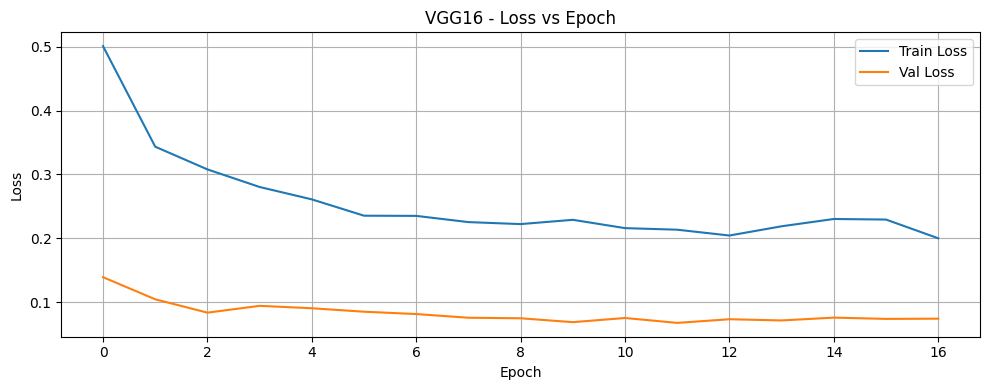

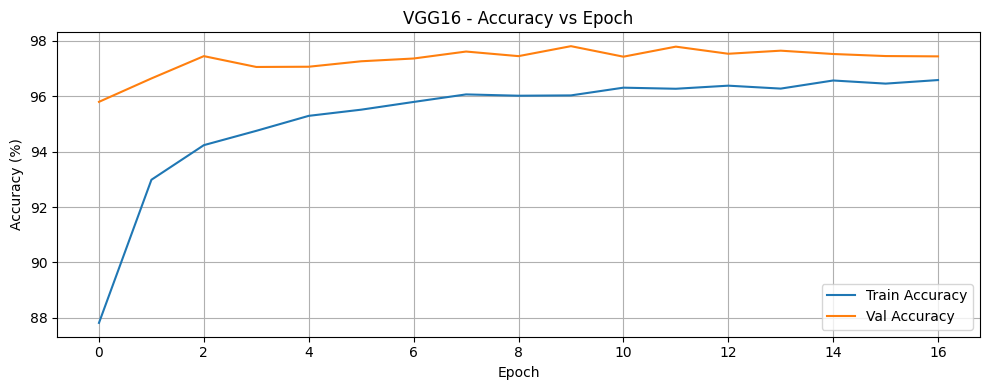

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("VGG16 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("VGG16 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.3.3 - VGG16 Confusion Matrix & Model Evaluation

After training, the performance of the VGG16 model was evaluated on the validation set to measure classification accuracy and generalization.

**Predictions:** The validation images were passed through the trained model and the predicted and true labels were collected.

**Confusion Matrix:** This grid shows how many times the model correctly predicted each digit and where it made mistakes.

The Classification Report shows:

*   **Precision:** How accurate the model's predictions were for each digit.
*   **Recall:** How many of the true digits the model correctly predicted.
*   **F1 Score:** A combination of precision and recall to give a balanced score.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


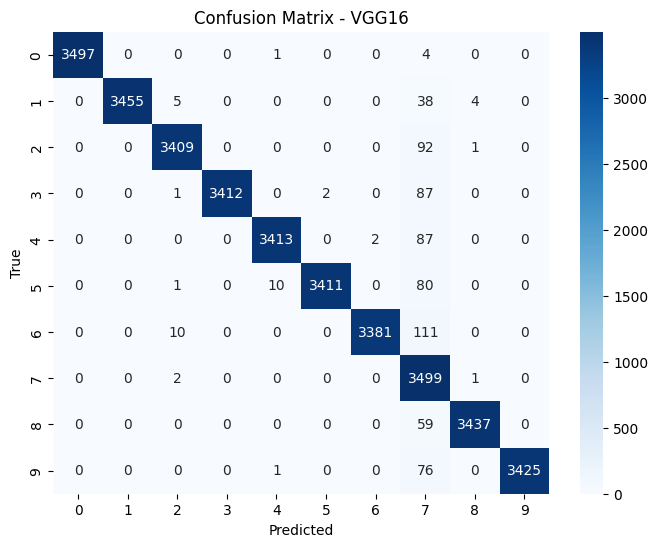


Classification Report - VGG16:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3502
           1       1.00      0.99      0.99      3502
           2       0.99      0.97      0.98      3502
           3       1.00      0.97      0.99      3502
           4       1.00      0.97      0.99      3502
           5       1.00      0.97      0.99      3502
           6       1.00      0.97      0.98      3502
           7       0.85      1.00      0.92      3502
           8       1.00      0.98      0.99      3496
           9       1.00      0.98      0.99      3502

    accuracy                           0.98     35014
   macro avg       0.98      0.98      0.98     35014
weighted avg       0.98      0.98      0.98     35014



In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()

        self.base_model = models.vgg16(pretrained=True)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)


# Load Model
model = VGG16SignLanguage(num_classes=10).to(device)
checkpoint = torch.load("/content/SL_Numbers_datasets/best_model_vgg16.pth", map_location=device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# Prediction
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


class_names = [str(i) for i in range(10)]

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - VGG16")
plt.show()

# Classification Report
print("\nClassification Report - VGG16:")
print(classification_report(all_labels, all_preds, target_names=class_names))

The classification report for the VGG16 model demonstrates high overall performance, achieving a 98% accuracy on the validation set. Precision, recall, and F1-scores are consistently high all classes, model was performed most digits scoring over 0.98. Particularly, class '7' shows slightly lower precision 0.85 however, achieves was reached perfect recall 1.00, indicating the model sometimes misclassifies other digits as '7', but sometimes misses real '7' instances.

These results confirm that the VGG16 model, enhanced through transfer learning, has effectively learned to distinguish between hand gesture digits with strong generalization and robustness.

## 3.4 - ResNet50 Transfer Learning Model Architecture

In this section, transfer learning is applied using ResNet50, a deep convolutional neural network architecture pre-trained on the ImageNet dataset. ResNet50 is particularly effective in training deep models due to the use of residual connections, which reduces the vanishing gradient problem and improves learning in very deep networks.

*   The pre-trained ResNet50 model was loaded with its default ImageNet weights.

*   An option was added to freeze all earlier layers, allowing us to preserve the learned visual features and train only the final classification layer on our hand gesture dataset.

*   The final fully connected layer was replaced with a new linear layer that outputs 10 classes, each corresponding to a digit from 0 to 9.

In [ ]:
import torch.nn as nn
from torchvision import models

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
print(model_resnet)

ResNet50SignLanguage(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequen

### 3.4.1 ResNet50 Model Training

The ResNet50 model was trained using a standard deep learning pipeline, consistent with the procedures used for the CNN and VGG16 models. To quantify classification errors, CrossEntropyLoss was employed, and Adam optimizer was used to update model weights.

**Training Setup**

*   **Loss function:** CrossEntropyLoss
*   **Optimizer:** Adam with learning rate 0.001
*   **Epochs:** Training was capped at 30 epochs with early stopping after 5 epochs of non-improving validation loss.
*   **Model saving:** The best-performing model based on validation loss was saved to best_model_resnet50.pth.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_resnet50.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_resnet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'ResNet50SignLanguage',
            'state_dict': model_resnet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 254.67s
  Train Loss: 0.8874 | Train Acc: 72.81%
  Val   Loss: 0.6253 | Val Acc: 80.82%
Best model was saved at epoch: 1
Epoch 2/30 | 254.11s
  Train Loss: 0.6022 | Train Acc: 80.67%
  Val   Loss: 0.5526 | Val Acc: 82.07%
Best model was saved at epoch: 2
Epoch 3/30 | 254.17s
  Train Loss: 0.5497 | Train Acc: 81.89%
  Val   Loss: 0.5122 | Val Acc: 83.34%
Best model was saved at epoch: 3
Epoch 4/30 | 254.08s
  Train Loss: 0.5249 | Train Acc: 82.80%
  Val   Loss: 0.4893 | Val Acc: 83.80%
Best model was saved at epoch: 4
Epoch 5/30 | 254.22s
  Train Loss: 0.5126 | Train Acc: 82.98%
  Val   Loss: 0.4959 | Val Acc: 83.66%
val_accuracy did not improve (1/5)
Epoch 6/30 | 254.14s
  Train Loss: 0.5046 | Train Acc: 83.21%
  Val   Loss: 0.4992 | Val Acc: 83.56%
val_accuracy did not improve (2/5)
Epoch 7/30 | 254.22s
  Train Loss: 0.4977 | Train Acc: 83.41%
  Val   Loss: 0.4763 | Val Acc: 84.16%
Best model was saved at epoch: 7
Epoch 8/30 | 253.87s
  Train Loss: 0.4941 | Train Acc: 83.

### 3.4.2 - ResNet50 Model Training Visualization

Both loss and accuracy for training and validation over all epochs were visualized:

*   Loss graphs help us see whether the model is learning (decreasing loss).
*   Accuracy graphs show how prediction quality improves over time.

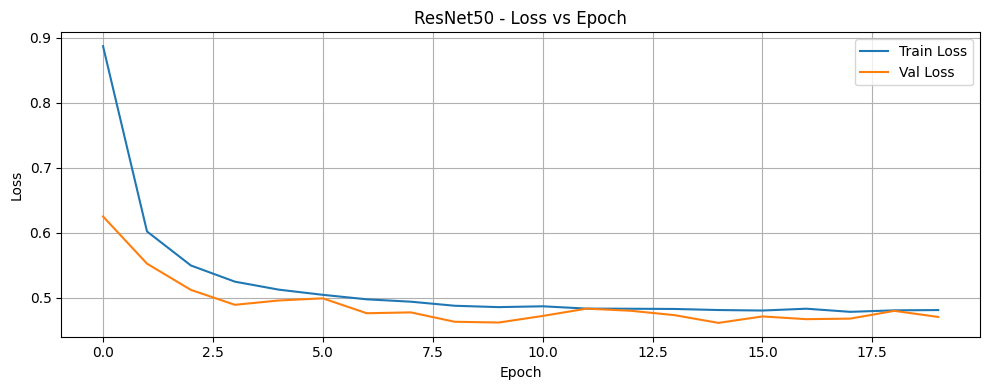

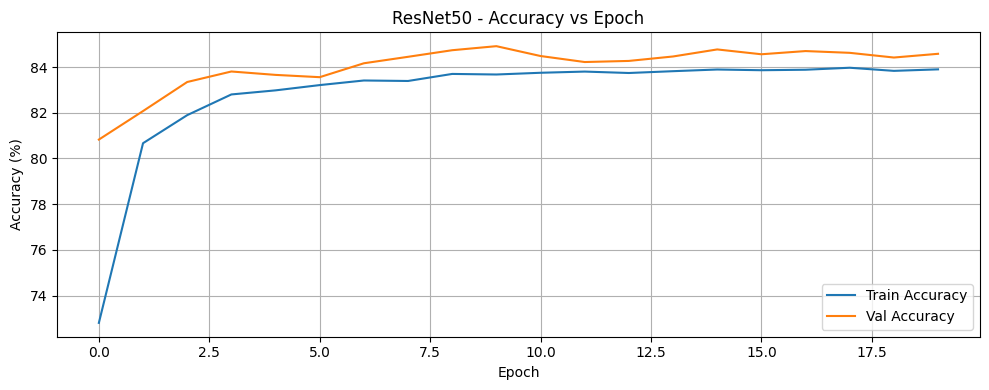

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("ResNet50 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("ResNet50 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4.3 - ResNet50 -  Confusion Matrix & Model Evaluation

Following the training phase, the ResNet50 model was evaluated on the validation dataset to assess its classification performance. As with previous models (CNN and VGG16), both a confusion matrix and a classification report were generated.

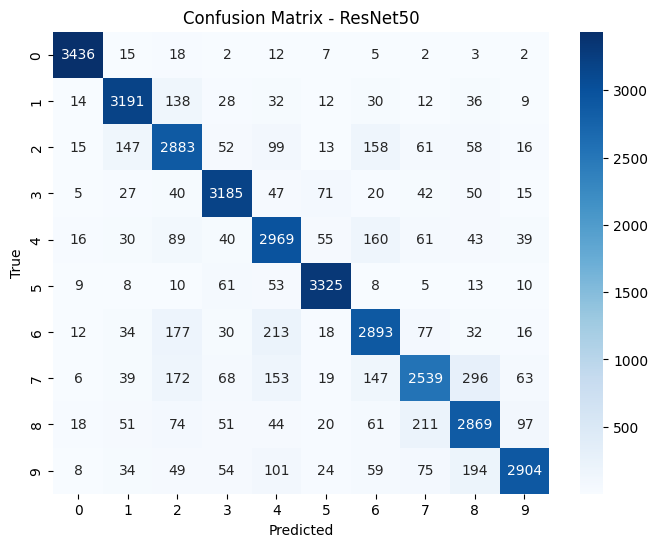


Classification Report - ResNet50:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3502
           1       0.89      0.91      0.90      3502
           2       0.79      0.82      0.81      3502
           3       0.89      0.91      0.90      3502
           4       0.80      0.85      0.82      3502
           5       0.93      0.95      0.94      3502
           6       0.82      0.83      0.82      3502
           7       0.82      0.73      0.77      3502
           8       0.80      0.82      0.81      3496
           9       0.92      0.83      0.87      3502

    accuracy                           0.86     35014
   macro avg       0.86      0.86      0.86     35014
weighted avg       0.86      0.86      0.86     35014



In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet50
class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)


# Load Model
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
checkpoint = torch.load("/content/SL_Numbers_datasets/best_model_resnet50.pth", map_location=device)
model_resnet.load_state_dict(checkpoint['state_dict'])
model_resnet.eval()

# Prediction
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_resnet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ResNet50")
plt.show()

# Classification Report
print("\nClassification Report - ResNet50:")
print(classification_report(all_labels, all_preds, target_names=class_names))

The ResNet50 model achieved an overall accuracy of 86% on the validation dataset. While some classes such as digit '0' (F1: 0.98) and digit '5' (F1: 0.94) were classified with high precision and recall, performance was lower for classes '2', '4', '7', and '8', with F1-scores around 0.77–0.82. In particular, class '7' showed the weakest recall (0.73), indicating the model struggled to correctly identify this digit.

These results suggest that although ResNet50 benefits from its deep architecture, it may require further fine-tuning or more class-balanced data augmentation to improve consistency across all digit classes.

### 3.4.4 - ResNet50 Fine Tuning

For making our model improve and increase the performance and predictions well so the model was improved by fine-tuning which means  `freeze=False` was set, so all layers of ResNet50 could be trained, not just the last one. This gave the model more freedom to learn from our specific hand gesture images.

In [ ]:
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=False).to(device)


 The same training loop was used  with a slightly stricter early stopping of `3 patience epochs`, and saved the best version as `best_model_resnet50_finetuning.pth`.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 3
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_resnet50_finetuning.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_resnet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'ResNet50SignLanguage',
            'state_dict': model_resnet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 681.00s
  Train Loss: 0.0771 | Train Acc: 97.63%
  Val   Loss: 0.1447 | Val Acc: 96.35%
Best model was saved at epoch: 1
Epoch 2/30 | 680.97s
  Train Loss: 0.0273 | Train Acc: 99.15%
  Val   Loss: 0.0474 | Val Acc: 98.77%
Best model was saved at epoch: 2
Epoch 3/30 | 680.83s
  Train Loss: 0.0181 | Train Acc: 99.43%
  Val   Loss: 0.0102 | Val Acc: 99.69%
Best model was saved at epoch: 3
Epoch 4/30 | 680.85s
  Train Loss: 0.0122 | Train Acc: 99.62%
  Val   Loss: 0.0108 | Val Acc: 99.67%
val_accuracy did not improve (1/3)
Epoch 5/30 | 682.18s
  Train Loss: 0.0099 | Train Acc: 99.69%
  Val   Loss: 0.0035 | Val Acc: 99.90%
Best model was saved at epoch: 5
Epoch 6/30 | 681.70s
  Train Loss: 0.0084 | Train Acc: 99.74%
  Val   Loss: 0.0030 | Val Acc: 99.90%
Best model was saved at epoch: 6
Epoch 7/30 | 681.61s
  Train Loss: 0.0064 | Train Acc: 99.82%
  Val   Loss: 0.0048 | Val Acc: 99.88%
val_accuracy did not improve (1/3)
Epoch 8/30 | 681.50s
  Train Loss: 0.0060 | Train Acc: 99.

### 3.4.5 - ResNet50 Fine Tuning Training Visualization

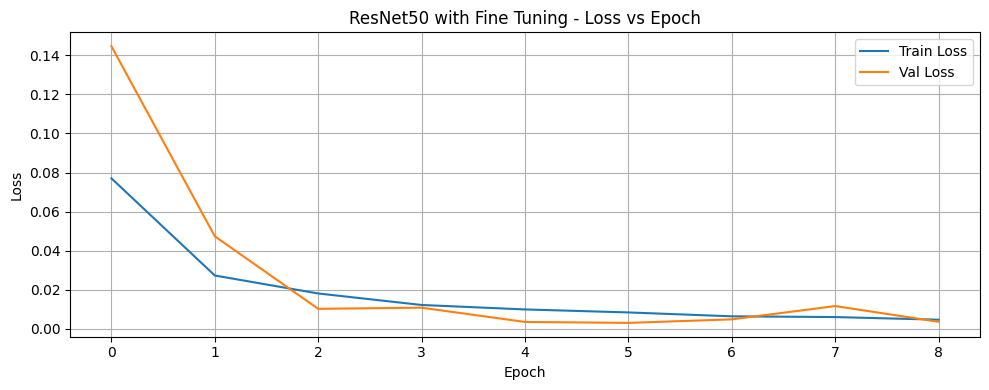

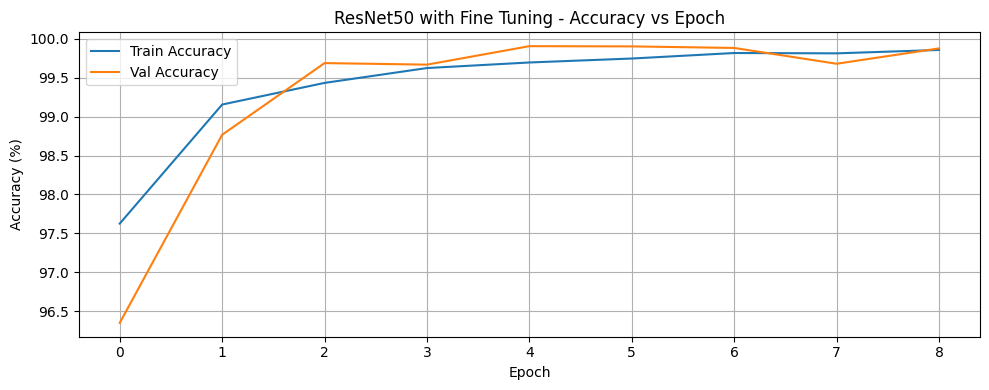

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("ResNet50 with Fine Tuning - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("ResNet50 with Fine Tuning - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4.6 - ResNet50 Fine-Tuned -  Confusion Matrix & Model Evaluation

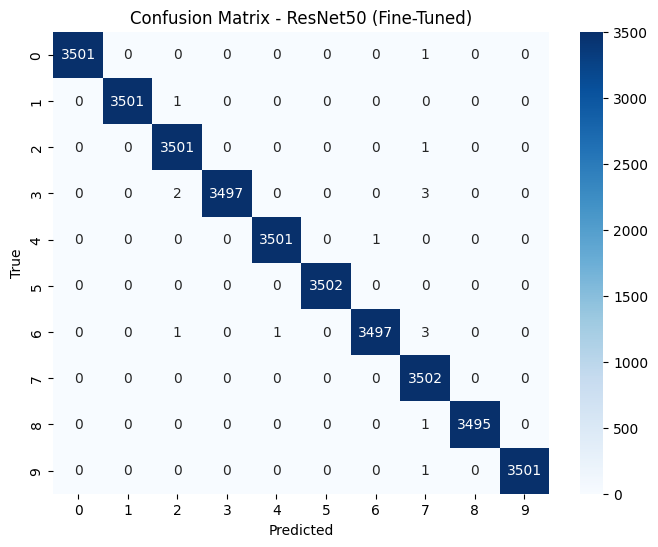


Classification Report - ResNet50 (Fine-Tuned): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3502
           1       1.00      1.00      1.00      3502
           2       1.00      1.00      1.00      3502
           3       1.00      1.00      1.00      3502
           4       1.00      1.00      1.00      3502
           5       1.00      1.00      1.00      3502
           6       1.00      1.00      1.00      3502
           7       1.00      1.00      1.00      3502
           8       1.00      1.00      1.00      3496
           9       1.00      1.00      1.00      3502

    accuracy                           1.00     35014
   macro avg       1.00      1.00      1.00     35014
weighted avg       1.00      1.00      1.00     35014



In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet50 Fine-Tuning Model
class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Load Model
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
checkpoint = torch.load("/content/SL_Numbers_datasets/best_model_resnet50_finetuning.pth", map_location=device)
model_resnet.load_state_dict(checkpoint['state_dict'])
model_resnet.eval()

# Prediction
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_resnet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ResNet50 (Fine-Tuned)")
plt.show()

# Classification Report
print("\nClassification Report - ResNet50 (Fine-Tuned): ")
print(classification_report(all_labels, all_preds, target_names=class_names))

After fine-tuning the ResNet50 model, good results were obtained in the above confusion matrix and classification report. The results showed that fine-tuning the full model increased the prediction accuracy, reduced errors, and handled the background or lighting change more effectively than the frozen version.


**Comparison below ResNet50 Frozen and Fine-tuned model**
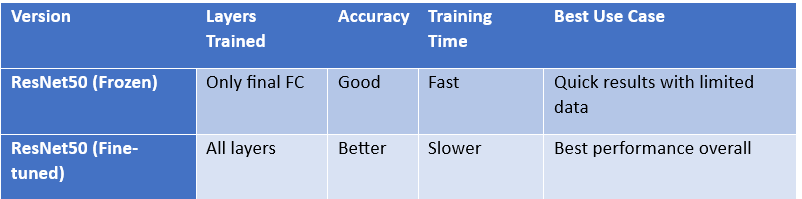


## 3.5 - MobileNetV2 Transfer Learning Model Architecture

MobileNetV2 is a lightweight and efficient convolutional neural network (CNN) architecture optimized for real-time and resource-constrained environments such as mobile and embedded devices. In this study, we adapted MobileNetV2 for the task of hand gesture digit classification using transfer learning.

*   A pre-trained MobileNetV2 model was loaded with ImageNet weights.

*   An option was provided to freeze the feature extraction layers and preserve the pre-trained visual representations.

*   The last classification layer was replaced with a new fully connected layer that extracted 10 classes, each representing a digit from 0 to 9.

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False


        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=True).to(device)
print(model_mobilenet)

MobileNetV2SignLanguage(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96,

### 3.5.1 - MobileNetV2 Model Training

The MobileNetV2 model was trained using the same standardized training procedure as previous models (CNN, VGG16, ResNet50), but with a focus on efficiency and speed due to its lightweight architecture. The CrossEntropyLoss function was used for multi-class classification, and the Adam optimizer was employed to update trainable parameters.

**Training Setup**

*   **Loss function:** CrossEntropyLoss
*   **Optimizer:** Adam with learning rate 0.001
*   **Epochs:** Training was capped at 30 epochs with early stopping after 5 epochs of non-improving validation loss.
*   **Model saving:** The best-performing model based on validation loss was saved to best_model_mobilenetv2.pth.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time

num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_mobilenetv2.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobilenet.parameters(), lr=0.001)


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_mobilenet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_mobilenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_mobilenet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_mobilenet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - epoch_start

    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'MobileNetV2SignLanguage',
            'state_dict': model_mobilenet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 111.30s
  Train Loss: 0.9893 | Train Acc: 68.08%
  Val   Loss: 0.6884 | Val Acc: 77.59%
Best model was saved at epoch: 1
Epoch 2/30 | 110.70s
  Train Loss: 0.8119 | Train Acc: 72.51%
  Val   Loss: 0.6434 | Val Acc: 78.63%
Best model was saved at epoch: 2
Epoch 3/30 | 110.71s
  Train Loss: 0.7940 | Train Acc: 73.04%
  Val   Loss: 0.6280 | Val Acc: 79.02%
Best model was saved at epoch: 3
Epoch 4/30 | 110.69s
  Train Loss: 0.7882 | Train Acc: 73.09%
  Val   Loss: 0.6089 | Val Acc: 79.60%
Best model was saved at epoch: 4
Epoch 5/30 | 110.69s
  Train Loss: 0.7844 | Train Acc: 73.28%
  Val   Loss: 0.5969 | Val Acc: 79.96%
Best model was saved at epoch: 5
Epoch 6/30 | 110.77s
  Train Loss: 0.7855 | Train Acc: 73.28%
  Val   Loss: 0.5952 | Val Acc: 80.03%
Best model was saved at epoch: 6
Epoch 7/30 | 110.67s
  Train Loss: 0.7868 | Train Acc: 73.34%
  Val   Loss: 0.6087 | Val Acc: 79.58%
val_accuracy did not improve (1/5)
Epoch 8/30 | 110.65s
  Train Loss: 0.7843 | Train Acc: 73.12

### 3.5.2 - MobileNetV2 Model Training Visualization

Loss and accuracy were visualized across all epochs for both training and validation. The plots help verify that the model is learning properly and not overfitting. Although frozen models train quickly, their accuracy may be slightly limited due to constrained learning in the base layers.

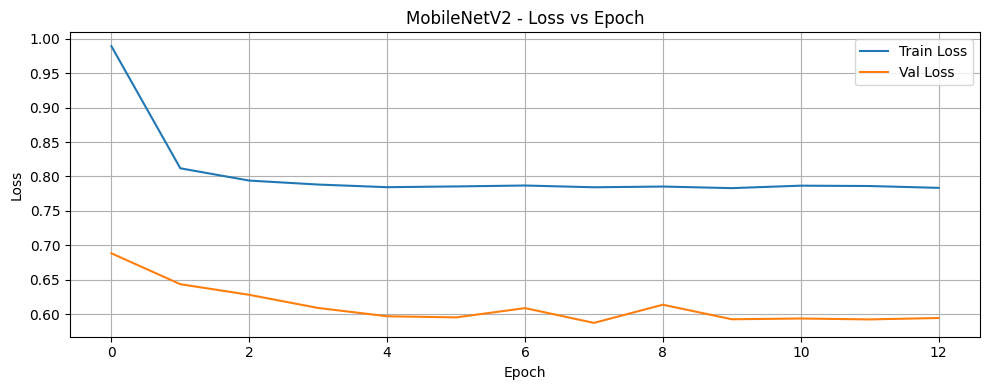

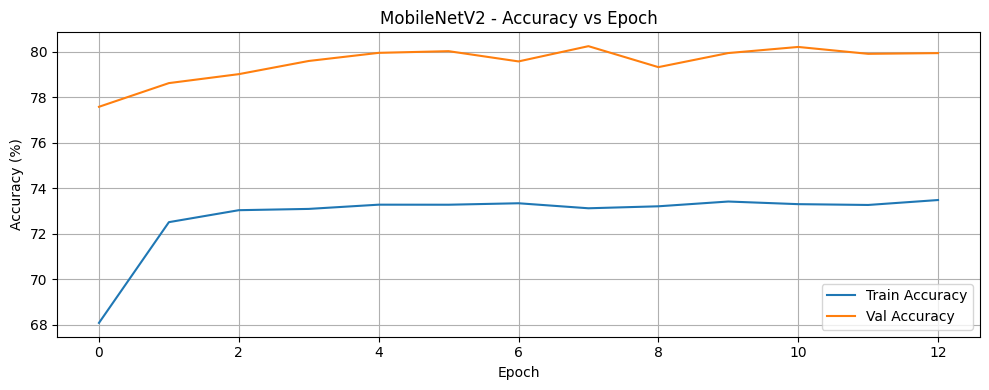

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("MobileNetV2 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("MobileNetV2 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.5.3 - MobileNetV2 - Confusion Matrix

The MobileNetV2 model achieved an overall accuracy of 81% on the validation dataset. While the model performed well on classes like digit '0' **F1: 0.95** and digit '5' **F1: 0.90**, it showed comparatively lower performance on classes '2', '4', '6', '7', and '8', with F1-scores ranging from 0.70 to 0.76.

In particular, class '7' had the lowest recall (0.68), suggesting a tendency of the model to misclassify instances of that digit. Despite being lightweight and efficient, MobileNetV2 may benefit from further fine-tuning or targeted augmentation to boost performance on more challenging classes.

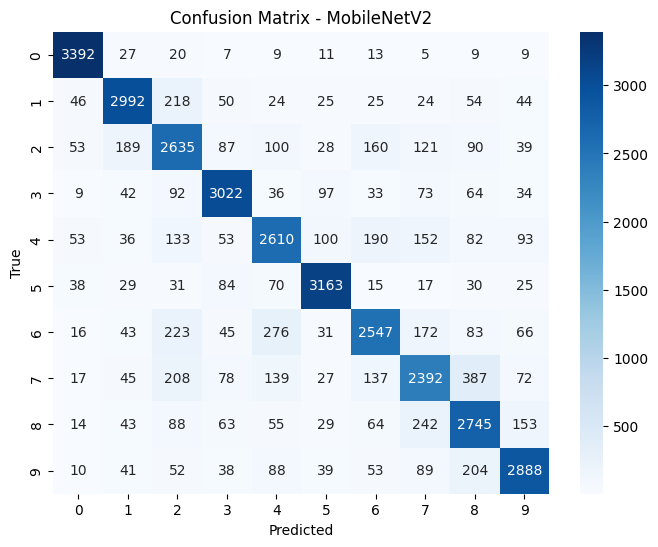


 Classification Report - MobileNetV2:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3502
           1       0.86      0.85      0.86      3502
           2       0.71      0.75      0.73      3502
           3       0.86      0.86      0.86      3502
           4       0.77      0.75      0.76      3502
           5       0.89      0.90      0.90      3502
           6       0.79      0.73      0.76      3502
           7       0.73      0.68      0.70      3502
           8       0.73      0.79      0.76      3496
           9       0.84      0.82      0.83      3502

    accuracy                           0.81     35014
   macro avg       0.81      0.81      0.81     35014
weighted avg       0.81      0.81      0.81     35014



In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MobileNetV2 Model
class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False


        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Load Model
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=True).to(device)
checkpoint = torch.load("/content/SL_Numbers_datasets/best_model_mobilenetv2.pth", map_location=device)
model_mobilenet.load_state_dict(checkpoint['state_dict'])
model_mobilenet.eval()

# Prediction
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_mobilenet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

# Classification Report
print("\n Classification Report - MobileNetV2:")
print(classification_report(all_labels, all_preds, target_names=class_names))

### 3.5.4 - MobileNetV2 Fine Tuning Architecture

To further improve performance,  fine-tuned version of MobileNetV2 was created a by setting freeze=False, allowing all layers of the model to be updated during training. This enables the model to better learn gesture-specific patterns beyond the generic ImageNet features.

In [ ]:
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)

In [ ]:
class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=False):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)
print(model_mobilenet)

MobileNetV2SignLanguage(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96,

### 3.5.5 - MobileNetV2 Fine Tuning Training

A lower learning rate (1e-4) was used to ensure that the pretrained weights were adjusted gradually, preserving the useful visual features learned from ImageNet.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

num_epochs = 30
patience = 3
best_val_loss = float('inf')
early_stop_counter = 0
save_path = "best_model_mobilenetv2_finetuned.pth"

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobilenet.parameters(), lr=1e-4)  # Low LR for fine tuning

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_mobilenet.train()
    running_loss = 0.0
    correct = 0
    total = 0


    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_mobilenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_mobilenet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_mobilenet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - epoch_start
    print(f"Epoch {epoch+1} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'MobileNetV2SignLanguage_FT',
            'state_dict': model_mobilenet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1 | 319.29s
  Train Loss: 0.1187 | Train Acc: 96.54%
  Val   Loss: 0.0059 | Val Acc: 99.83%
Best model was saved at epoch: 1
Epoch 2 | 318.18s
  Train Loss: 0.0091 | Train Acc: 99.73%
  Val   Loss: 0.0023 | Val Acc: 99.93%
Best model was saved at epoch: 2
Epoch 3 | 318.18s
  Train Loss: 0.0057 | Train Acc: 99.82%
  Val   Loss: 0.0027 | Val Acc: 99.92%
val_accuracy did not improve (1/3)
Epoch 4 | 318.34s
  Train Loss: 0.0044 | Train Acc: 99.87%
  Val   Loss: 0.0057 | Val Acc: 99.82%
val_accuracy did not improve (2/3)
Epoch 5 | 318.18s
  Train Loss: 0.0042 | Train Acc: 99.86%
  Val   Loss: 0.0073 | Val Acc: 99.85%
val_accuracy did not improve (3/3)
early stopping
Training time: 26 minutes 32 seconds


### 3.5.6 - MobileNetV2 Fine Tuning Training Visualization

Loss and Accuracy graphs of Fine tuning training curves showed more stable and higher accuracy compared to the frozen model, confirming the benefit of allowing the entire model to learn from our hand gesture data.

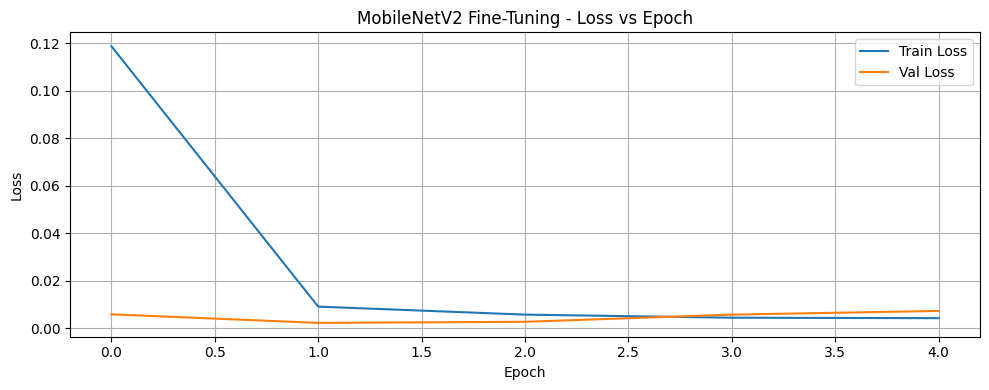

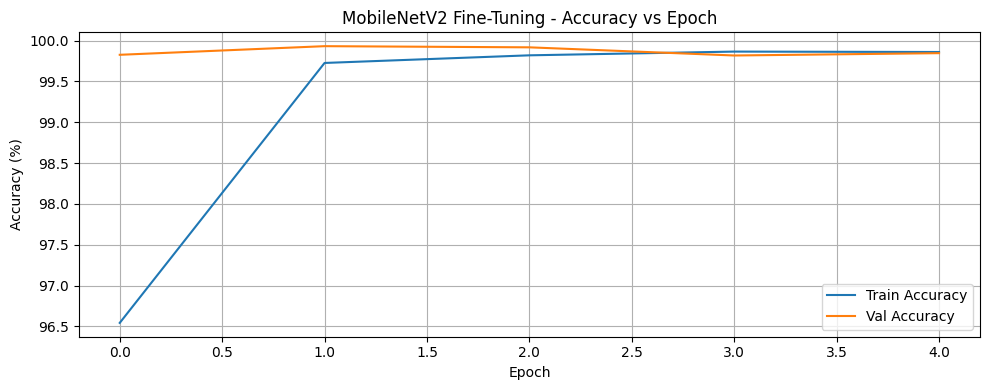

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("MobileNetV2 Fine-Tuning - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("MobileNetV2 Fine-Tuning - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.5.7 - MobileNetV2 Fine Tuning Confusion Matrix & Model Evaluation

After fine-tuning the MobileNetV2 we clearly see the result in

**Confusion matrix**: Showed improved clarity with fewer misclassifications.

**Classification report**: Reported higher precision, recall, and F1-scores for most digits.

The results confirmed that fine-tuning significantly improved the model's performance and generalization ability.

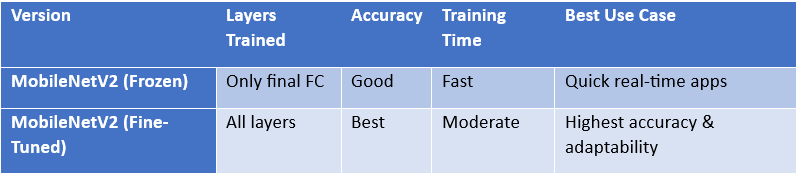

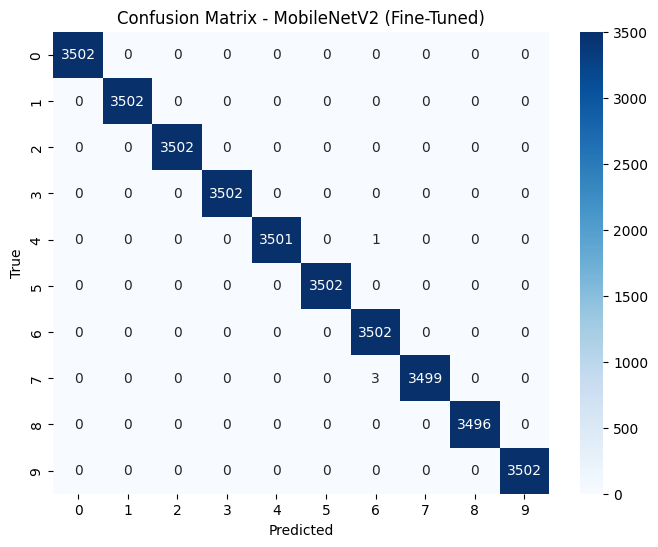


Classification Report - MobileNetV2 (Fine-Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3502
           1       1.00      1.00      1.00      3502
           2       1.00      1.00      1.00      3502
           3       1.00      1.00      1.00      3502
           4       1.00      1.00      1.00      3502
           5       1.00      1.00      1.00      3502
           6       1.00      1.00      1.00      3502
           7       1.00      1.00      1.00      3502
           8       1.00      1.00      1.00      3496
           9       1.00      1.00      1.00      3502

    accuracy                           1.00     35014
   macro avg       1.00      1.00      1.00     35014
weighted avg       1.00      1.00      1.00     35014



In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MobileNetV2 Fine-Tuning Model
class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=False):  # Fine-tuning
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Load Model
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)
checkpoint = torch.load("/content/SL_Numbers_datasets/best_model_mobilenetv2_finetuned.pth", map_location=device)
model_mobilenet.load_state_dict(checkpoint['state_dict'])
model_mobilenet.eval()

# Prediction
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_mobilenet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2 (Fine-Tuned)")
plt.show()

# Classification Report
print("\nClassification Report - MobileNetV2 (Fine-Tuned):")
print(classification_report(all_labels, all_preds, target_names=class_names))

# **Chapter 4: Model Comparison**

In this section, a comparative analysis of six different deep learning models designed for hand gesture digit classification was performed.

*   A custom-built CNN architecture,

*   Three popular pre-trained architectures using transfer learning: VGG16, ResNet50, and MobileNetV2,

*   Tuned versions of ResNet50 and MobileNetV2 for improved.

Each model was evaluated training and validation accuracy, loss values, and training time. While the custom CNN model provided strong performance with fast training, the fine-tuned pre-trained models ResNet50 and MobileNetV2 achieved the highest validation accuracies over 99.9%.

The VGG16 and MobileNetV2 showed enough performance. However, It was  showed limitations in generalization compared to their fine-tuned counterparts. This highlights the importance of fine-tuning for optimal performance, especially when developing general-purpose models to specific area such as sign language recognition.

Additionally, training time varied significantly between models, with MobileNetV2 offering the best balance between speed and accuracy, making it well-suited for real-time applications.

This comparison provides a comprehensive view of how different architectures and training strategies affect model effectiveness in recognizing sign language digits.

All model architecture were loaded.

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# CNN
class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# VGG16
class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()
        self.base_model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False
        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

# ResNet50
class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False
        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# MobileNetV2
class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)


All models' weights have been defined and placed in folders to be uploaded

In [ ]:
# Load All Model pth file
model_cnn = SignLanguageCNN().to(device)
model_cnn.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_cnn.pth", map_location=device)['state_dict'])

model_vgg = VGG16SignLanguage(num_classes=10, freeze=True).to(device)
model_vgg.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_vgg16.pth", map_location=device)['state_dict'])

model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
model_resnet.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_resnet50.pth", map_location=device)['state_dict'])

model_resnet_ft = ResNet50SignLanguage(num_classes=10, freeze=False).to(device)
model_resnet_ft.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_resnet50_finetuning.pth", map_location=device)['state_dict'])

model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=True).to(device)
model_mobilenet.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_mobilenetv2.pth", map_location=device)['state_dict'])

model_mobilenet_ft = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)
model_mobilenet_ft.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_mobilenetv2_finetuned.pth", map_location=device)['state_dict'])


<All keys matched successfully>

*   **ResNet50 Fine-Tuning** and **MobileNetV2 Fine-Tuning** achieved the highest validation accuracy ~99.9%, while maintaining very low validation losses 0.0030 and 0.0023. These results highlight the effectiveness of fine-tuning pretrained models when sufficient data and training epochs are provided.

*   The **custom CNN model** also demonstrated strong performance, achieving validation accuracy of 96.98% with relatively short training time 37 minutes, proving its suitability for balanced and mid-scale datasets.

*   **VGG16** showed robust generalization 97.79% validation accuracy, though it required significantly more training time 171 minutes, reflecting its larger architecture.

*   MobileNetV2 frozen, although lightweight and fast 24-minute training time, performed modestly with a validation accuracy of 80.25%, suggesting the importance of fine-tuning for deeper generalization.


In [ ]:
import pandas as pd

# Model Name
models = ["CNN", "VGG16", "ResNet50", "ResNet50 Fine-Tuning", "MobileNetV2", "MobileNetV2 Fine-Tuning"]

# Performance All Models
accuracies = [0.9945, 0.9627, 0.8389, 0.9974, 0.7312, 0.9973]
losses = [0.0189, 0.2134, 0.4812, 0.0084, 0.7843, 0.0091]
val_accuracies = [0.9698, 0.9779, 0.8477, 0.9990, 0.8025, 0.9993]
val_losses = [0.1370, 0.0675, 0.4614, 0.0030, 0.5872, 0.0023]

# Training Time
training_times = ["37m 24s", "171m 34s", "84m 41s", "102m 13s", "24m 00s", "26m 32s"]

# Crate Table
df_comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Loss": losses,
    "Validation Accuracy": val_accuracies,
    "Validation Loss": val_losses,
    "Training Time": training_times
})

# Show Table
display(df_comparison)

Model  Accuracy    Loss  Validation Accuracy  \
0                      CNN    0.9945  0.0189               0.9698   
1                    VGG16    0.9627  0.2134               0.9779   
2                 ResNet50    0.8389  0.4812               0.8477   
3     ResNet50 Fine-Tuning    0.9974  0.0084               0.9990   
4              MobileNetV2    0.7312  0.7843               0.8025   
5  MobileNetV2 Fine-Tuning    0.9973  0.0091               0.9993   

   Validation Loss Training Time  
0           0.1370       37m 24s  
1           0.0675      171m 34s  
2           0.4614       84m 41s  
3           0.0030      102m 13s  
4           0.5872       24m 00s  
5           0.0023       26m 32s

Fine-tuning pretrained deep networks significantly improved model performance. Among all models, **MobileNetV2 Fine-Tuning** provided the best trade-off between accuracy, loss, and training time, making it an ideal choice for real-time sign language digit recognition applications.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# All Model
models = {
    "CNN": model_cnn,
    "VGG16": model_vgg,
    "ResNet50": model_resnet,
    "ResNet50 FT": model_resnet_ft,
    "MobileNetV2": model_mobilenet,
    "MobileNetV2 FT": model_mobilenet_ft
}

results = []

for name, model in models.items():
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    report = classification_report(all_labels, all_preds, output_dict=True)
    macro = report['macro avg']
    weighted = report['weighted avg']
    results.append({
        "Model": name,
        "Macro Precision": round(macro['precision'], 4),
        "Macro Recall": round(macro['recall'], 4),
        "Macro F1": round(macro['f1-score'], 4),
        "Weighted Precision": round(weighted['precision'], 4),
        "Weighted Recall": round(weighted['recall'], 4),
        "Weighted F1": round(weighted['f1-score'], 4),
    })

df_metrics = pd.DataFrame(results)
display(df_metrics)

Model  Macro Precision  Macro Recall  Macro F1  \
0             CNN           0.9971        0.9971    0.9971   
1           VGG16           0.9835        0.9807    0.9814   
2        ResNet50           0.8630        0.8623    0.8620   
3     ResNet50 FT           0.9995        0.9995    0.9995   
4     MobileNetV2           0.8105        0.8107    0.8102   
5  MobileNetV2 FT           0.9999        0.9999    0.9999   

   Weighted Precision  Weighted Recall  Weighted F1  
0              0.9971           0.9971       0.9971  
1              0.9835           0.9807       0.9814  
2              0.8630           0.8623       0.8620  
3              0.9995           0.9995       0.9995  
4              0.8105           0.8107       0.8102  
5              0.9999           0.9999       0.9999

The table summarizes the classification performance of all models based on macro and weighted precision, recall, and F1-score. The fine-tuned versions of **ResNet50** and **MobileNetV2** clearly outperform all others, each achieving nearly perfect scores ~0.9999 across all metrics.

The **custom CNN** model also performs exceptionally well ~0.9971, while VGG16 maintains strong performance with macro and weighted F1-scores around 0.98.

In contrast, **ResNet50** and **MobileNetV2** show lower results, especially **MobileNetV2** ~0.81, indicating limited learning capacity without fine-tuning.

Overall, the results reinforce that fine-tuning pretrained models yields the highest classification effectiveness, while the CNN model provides a strong alternative with minimal complexity.

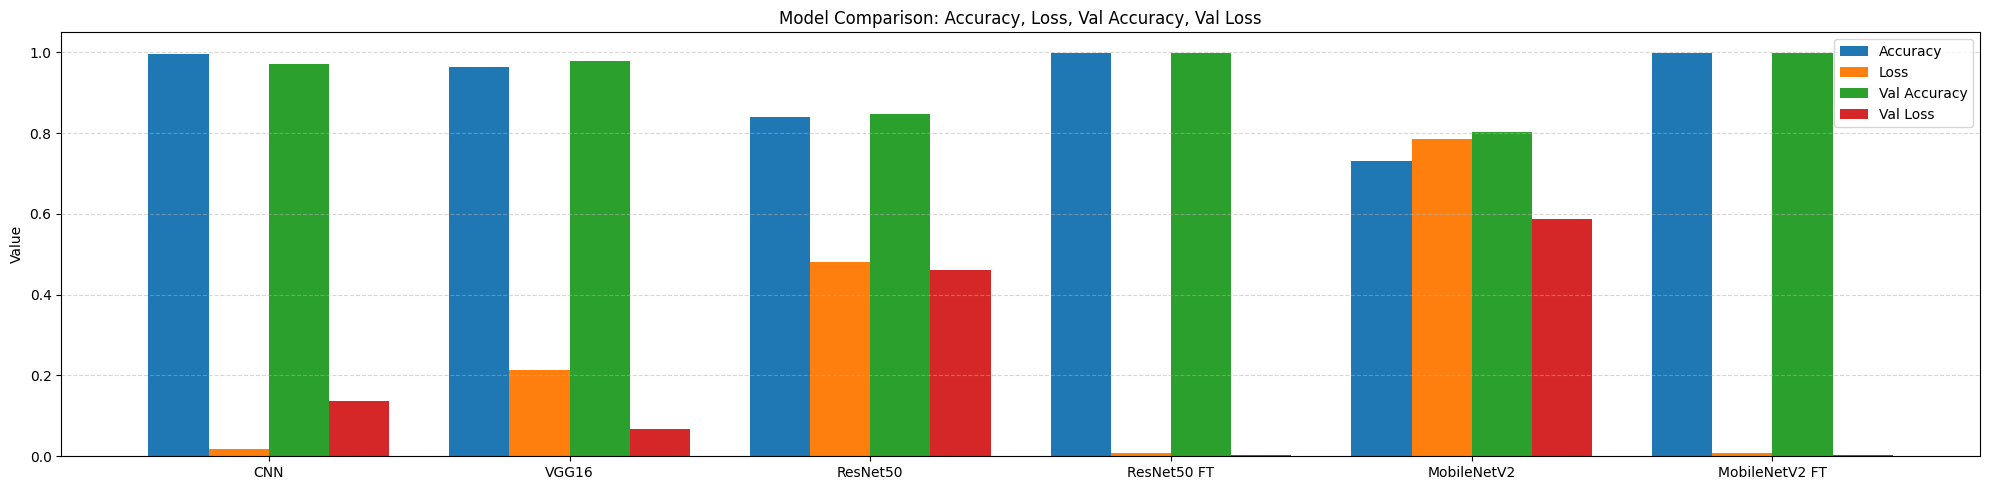

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ["CNN", "VGG16", "ResNet50", "ResNet50 FT", "MobileNetV2", "MobileNetV2 FT"]
accuracies = [0.9945, 0.9627, 0.8389, 0.9974, 0.7312, 0.9973]
losses = [0.0189, 0.2134, 0.4812, 0.0084, 0.7843, 0.0091]
val_accuracies = [0.9698, 0.9779, 0.8477, 0.9990, 0.8025, 0.9993]
val_losses = [0.1370, 0.0675, 0.4614, 0.0030, 0.5872, 0.0023]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(20, 5))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, losses, width, label='Loss')
plt.bar(x + 0.5*width, val_accuracies, width, label='Val Accuracy')
plt.bar(x + 1.5*width, val_losses, width, label='Val Loss')

plt.xticks(x, models)
plt.ylabel("Value")
plt.title("Model Comparison: Accuracy, Loss, Val Accuracy, Val Loss")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Chapter 5: Prediction for Google Colab**

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.9 MB/s eta 

## 5.1 - Camera Defination

In [ ]:
import torch
import torch.nn as nn
import cv2
import base64
import numpy as np
from torchvision import transforms, models
from PIL import Image as PilImage
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import mediapipe as mp
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Take Photo Def
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript("""
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    """)
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


## 5.2 - Definition Models Architecture

In [ ]:
# Label Map
label_map = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
    5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
}

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()
        self.base_model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False
        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False
        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

## 5.3 - Load Models

In [ ]:
model_cnn = SignLanguageCNN().to(device)
model_cnn.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_cnn.pth", map_location=device)['state_dict'])

model_vgg = VGG16SignLanguage(num_classes=10, freeze=True).to(device)
model_vgg.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_vgg16.pth", map_location=device)['state_dict'])

model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
model_resnet.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_resnet50.pth", map_location=device)['state_dict'])

model_resnet_ft = ResNet50SignLanguage(num_classes=10, freeze=False).to(device)
model_resnet_ft.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_resnet50_finetuning.pth", map_location=device)['state_dict'])

model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=True).to(device)
model_mobilenet.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_mobilenetv2.pth", map_location=device)['state_dict'])

model_mobilenet_ft = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)
model_mobilenet_ft.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_mobilenetv2_finetuned.pth", map_location=device)['state_dict'])

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:02<00:00, 222MB/s]


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 216MB/s]


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 113MB/s] 


<All keys matched successfully>

## 5.4 - Prediction


Choose Model:
1 - CNN
2 - VGG16
3 - ResNet50
4 - ResNet50 (Fine-tuned)
5 - MobileNetV2
6 - MobileNetV2 (Fine-tuned)
Model Number (1-6): 1
Selected Model: CNN

Show your hand to the camera and press the button to take a photo


<IPython.core.display.Javascript object>

Hand not detected. Please try again.

Show your hand to the camera and press the button to take a photo


<IPython.core.display.Javascript object>

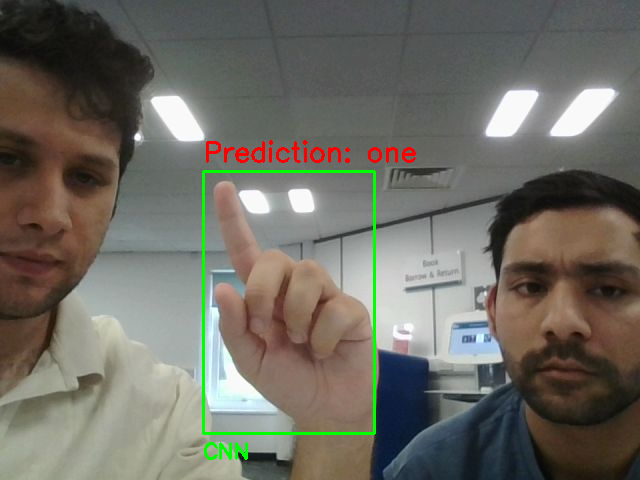

Prediction Class: one (Model: CNN)

Command options:
enter: Continue
c    : Change Model
q    : Stop the Program
Enter Commands (enter / c / q): c

Choose Model:
1 - CNN
2 - VGG16
3 - ResNet50
4 - ResNet50 (Fine-tuned)
5 - MobileNetV2
6 - MobileNetV2 (Fine-tuned)
Model Number (1-6): 3
Selected Model: ResNet50

Show your hand to the camera and press the button to take a photo


<IPython.core.display.Javascript object>

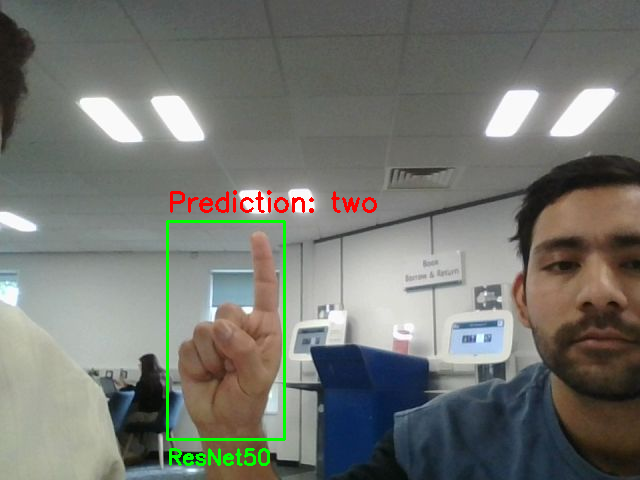

Prediction Class: two (Model: ResNet50)

Command options:
enter: Continue
c    : Change Model
q    : Stop the Program
Enter Commands (enter / c / q): c

Choose Model:
1 - CNN
2 - VGG16
3 - ResNet50
4 - ResNet50 (Fine-tuned)
5 - MobileNetV2
6 - MobileNetV2 (Fine-tuned)
Model Number (1-6): 4
Selected Model: ResNet50 (Fine-tuned)

Show your hand to the camera and press the button to take a photo


<IPython.core.display.Javascript object>

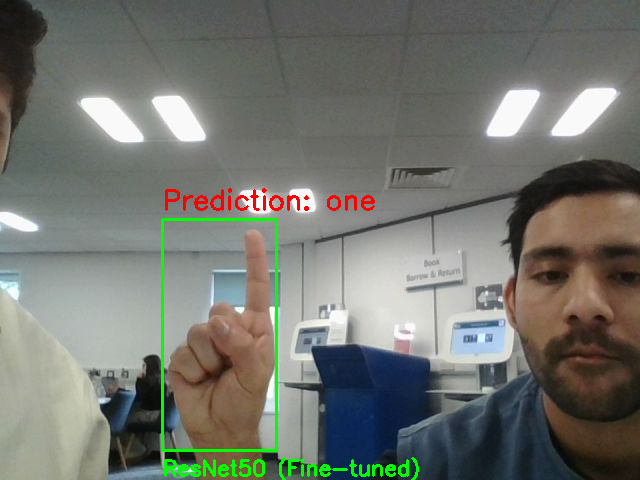

Prediction Class: one (Model: ResNet50 (Fine-tuned))

Command options:
enter: Continue
c    : Change Model
q    : Stop the Program


In [ ]:
# All Models
model_dict = {
    "1": ("CNN", model_cnn),
    "2": ("VGG16", model_vgg),
    "3": ("ResNet50", model_resnet),
    "4": ("ResNet50 (Fine-tuned)", model_resnet_ft),
    "5": ("MobileNetV2", model_mobilenet),
    "6": ("MobileNetV2 (Fine-tuned)", model_mobilenet_ft)
}

# MediaPipe Function
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)

# Choose Model
def select_model():
    print("\nChoose Model:")
    for key, (name, _) in model_dict.items():
        print(f"{key} - {name}")
    selected = input("Model Number (1-6): ").strip()
    if selected not in model_dict:
        raise ValueError("Wrong Model Number!")
    model_name, model = model_dict[selected]
    model.eval()
    print(f"Selected Model: {model_name}")
    return model, model_name

# Prediction
model, model_name = select_model()

while True:
    print("\nShow your hand to the camera and press the button to take a photo")
    image_path = take_photo()

    frame = cv2.imread(image_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        image_height, image_width, _ = frame_rgb.shape

        x_coords = [lm.x * image_width for lm in hand_landmarks.landmark]
        y_coords = [lm.y * image_height for lm in hand_landmarks.landmark]
        x_min, x_max = int(min(x_coords)), int(max(x_coords))
        y_min, y_max = int(min(y_coords)), int(max(y_coords))

        margin = 20
        x_min = max(x_min - margin, 0)
        y_min = max(y_min - margin, 0)
        x_max = min(x_max + margin, image_width)
        y_max = min(y_max + margin, image_height)

        roi = frame_rgb[y_min:y_max, x_min:x_max]
        roi_resized = cv2.resize(roi, (224, 224))

        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
        tensor_img = transform(roi_resized).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(tensor_img)
            _, predicted = torch.max(output, 1)
            predicted_label = predicted.item()
            predicted_text = label_map[predicted_label]

        frame_display = frame_rgb.copy()
        cv2.rectangle(frame_display, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(frame_display, f"Prediction: {predicted_text}", (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        cv2.putText(frame_display, f"{model_name}", (x_min, y_max + 25),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        cv2_imshow(cv2.cvtColor(frame_display, cv2.COLOR_RGB2BGR))
        print(f"Prediction Class: {predicted_text} (Model: {model_name})")
    else:
        print("Hand not detected. Please try again.")
        continue

    print("\nCommand options:")
    print("enter: Continue")
    print("c    : Change Model")
    print("q    : Stop the Program")

    cont = input("Enter Commands (enter / c / q): ").strip().lower()

    if cont in ["q", "quit", "exit"]:
        print("Exiting the application...")
        break
    elif cont in ["c", "change", "change model"]:
        model, model_name = select_model()
        continue
    else:
        continue

# **Chapter 6: Live Prediction with Jupyter Notebook**

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## 6.1 - Definition Models Architecture

In [ ]:
import cv2
import torch
import torch.nn as nn
import numpy as np
from torchvision import models, transforms
import mediapipe as mp

# Label map
label_map = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
    5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
}

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model Architectures
class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()
        self.base_model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False
        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False
        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

C:\Users\Orhan\anaconda3\envs\tf_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## 6.2 - Load Models

In [ ]:
# Model Loading
model_cnn = SignLanguageCNN().to(device)
model_cnn.load_state_dict(torch.load("C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets\\best_model_cnn.pth", map_location=device)['state_dict'])

model_vgg = VGG16SignLanguage().to(device)
model_vgg.load_state_dict(torch.load("C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets\\best_model_vgg16.pth", map_location=device)['state_dict'])

model_resnet = ResNet50SignLanguage().to(device)
model_resnet.load_state_dict(torch.load("C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets\\best_model_resnet50.pth", map_location=device)['state_dict'])

model_resnet_ft = ResNet50SignLanguage(freeze=False).to(device)
model_resnet_ft.load_state_dict(torch.load("C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets\\best_model_resnet50_finetuning.pth", map_location=device)['state_dict'])

model_mobilenet = MobileNetV2SignLanguage().to(device)
model_mobilenet.load_state_dict(torch.load("C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets\\best_model_mobilenetv2.pth", map_location=device)['state_dict'])

model_mobilenet_ft = MobileNetV2SignLanguage(freeze=False).to(device)
model_mobilenet_ft.load_state_dict(torch.load("C:\\Users\\Orhan\\SL_Numbers_Project\\SL_Numbers_datasets\\best_model_mobilenetv2_finetuned.pth", map_location=device)['state_dict'])

<All keys matched successfully>

## 6.3 - Real Time Prediction

In [ ]:
# Model selector
models_loaded = {
    "1": ("CNN", model_cnn),
    "2": ("VGG16", model_vgg),
    "3": ("ResNet50", model_resnet),
    "4": ("ResNet50 - Fine Tuning)", model_resnet_ft),
    "5": ("MobileNetV2", model_mobilenet),
    "6": ("MobileNetV2 - Fine Tuning", model_mobilenet_ft),
}

print("Select Models:")
for k, (name, _) in models_loaded.items():
    print(f"{k} - {name}")
selected_key = input("Enter the Model Number (1-6): ").strip()
model_name, model = models_loaded.get(selected_key, ("CNN", model_cnn))
model.eval()
print(f"Selected Model name: {model_name}")

# MediaPipe setup
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=1,
                       min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Transform
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Camera
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
print("Camera is started. Press 'q' to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        h, w, _ = frame.shape
        hand_landmarks = results.multi_hand_landmarks[0]
        x_coords = [lm.x for lm in hand_landmarks.landmark]
        y_coords = [lm.y for lm in hand_landmarks.landmark]
        x1, y1 = int(min(x_coords) * w), int(min(y_coords) * h)
        x2, y2 = int(max(x_coords) * w), int(max(y_coords) * h)

        # ROI
        x1, y1 = max(x1 - 20, 0), max(y1 - 20, 0)
        x2, y2 = min(x2 + 20, w), min(y2 + 20, h)
        roi = frame[y1:y2, x1:x2]

        if roi.shape[0] > 0 and roi.shape[1] > 0:
            input_tensor = transform(roi).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(input_tensor)
                probs = torch.softmax(output, dim=1)
                conf, pred = torch.max(probs, 1)
                label = label_map[pred.item()]
                acc = conf.item()

            color = (0, 255, 0) if acc > 0.9 else (0, 0, 255)
            cv2.putText(frame, f"{label} ({acc*100:.1f}%)", (x1, y1 - 10),cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f"Model: {model_name}", (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    cv2.imshow(f"Hand Sign Prediction ({model_name})", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exit Program")
        break

cap.release()
cv2.destroyAllWindows()

Select Models:
1 - CNN
2 - VGG16
3 - ResNet50
4 - ResNet50 - Fine Tuning)
5 - MobileNetV2
6 - MobileNetV2 - Fine Tuning


Enter the Model Number (1-6):  6


Selected Model name: MobileNetV2 - Fine Tuning
Camera is started. Press 'q' to exit.
Exit Program
